_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [9]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [11]:
income.head()

geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted
0  afg  1800                                                603    
1  afg  1801                                                603    
2  afg  1802                                                603    
3  afg  1803                                                603    
4  afg  1804                                                603

In [12]:
lifespan.head()

geo  time  life_expectancy_years
0  abw  1800                  34.42
1  abw  1801                  34.42
2  abw  1802                  34.42
3  abw  1803                  34.42
4  abw  1804                  34.42

In [13]:
population.head()

geo  time  population_total
0  afg  1800           3280000
1  afg  1801           3280000
2  afg  1802           3280000
3  afg  1803           3280000
4  afg  1804           3280000

In [14]:
pd.options.display.max_columns = 500
entities.head()

country alt_5                    alternative_1 alternative_2 alternative_3  \
0    abkh   NaN                              NaN           NaN           NaN   
1     abw   NaN                              NaN           NaN           NaN   
2     afg   NaN  Islamic Republic of Afghanistan           NaN           NaN   
3     ago   NaN                              NaN           NaN           NaN   
4     aia   NaN                              NaN           NaN           NaN   

  alternative_4_cdiac arb1 arb2 arb3 arb4 arb5 arb6 g77_and_oecd_countries  \
0                 NaN  NaN  NaN  NaN  NaN  NaN  NaN                 others   
1               Aruba  NaN  NaN  NaN  NaN  NaN  NaN                 others   
2         Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN                    g77   
3              Angola  NaN  NaN  NaN  NaN  NaN  NaN                    g77   
4                 NaN  NaN  NaN  NaN  NaN  NaN  NaN                 others   

  gapminder_list god_id gwid        income_groups  is--country  \
0       Abkhazia  GE-AB   i0                  NaN         True   
1          Aruba     AW  i12          high_income         True   
2    Afghanistan     AF   i1           low_income         True   
3         Angola     AO   i7  upper_middle_income         True   
4       Anguilla     AI   i8                  NaN         True   

  iso3166_1_alpha2 iso3166_1_alpha3  iso3166_1_numeric iso3166_2  landlocked  \
0              NaN              NaN                NaN       NaN         NaN   
1               AW              ABW              533.0       NaN   coastline   
2               AF              AFG                4.0       NaN  landlocked   
3               AO              AGO               24.0       NaN   coastline   
4               AI              AIA              660.0       NaN   coastline   

   latitude  longitude main_religion_2008         name        pandg  un_state  \
0       NaN        NaN                NaN     Abkhazia          NaN     False   
1  12.50000  -69.96667          christian        Aruba          NaN     False   
2  33.00000   66.00000             muslim  Afghanistan  AFGHANISTAN      True   
3 -12.50000   18.50000          christian       Angola       ANGOLA      True   
4  18.21667  -63.05000          christian     Anguilla          NaN     False   

  unicode_region_subtag upper_case_name world_4region        world_6region  
0                   NaN             NaN        europe  europe_central_asia  
1                    AW           ARUBA      americas              america  
2                    AF     AFGHANISTAN          asia           south_asia  
3                    AO          ANGOLA        africa   sub_saharan_africa  
4                    AI        ANGUILLA      americas              america

In [15]:
concepts.head()

concept color concept_type  \
0                  adults_with_hiv_percent_age_15_49   NaN      measure   
1                          age_at_1st_marriage_women   NaN      measure   
2                 aged_15_24_employment_rate_percent   NaN      measure   
3               aged_15_24_unemployment_rate_percent   NaN      measure   
4  aged_15_64_labour_force_participation_rate_per...   NaN      measure   

                                         description description_long domain  \
0  The estimated percentage of adults aged 15 to ...              NaN    NaN   
1  The mean age, in years, of first marriage for ...              NaN    NaN   
2  Percentage of total population, age group 15-2...              NaN    NaN   
3  Percentage of total population, age group 15-2...              NaN    NaN   
4  For age group 15-64, percentage of all labour ...              NaN    NaN   

  drill_up indicator_url                                            name  \
0      NaN           NaN                  Adults with HIV (%, age 15-49)   
1      NaN           NaN                     Age at 1st marriage (women)   
2      NaN           NaN                  Aged 15-24 employment rate (%)   
3      NaN           NaN                Aged 15-24 unemployment rate (%)   
4      NaN           NaN  Aged 15-64 labour force participation rate (%)   

                     name_catalog                           name_short  \
0  Adults with HIV (%, age 15-49)                      Adults with HIV   
1     Age at 1st marriage (women)                  Age at 1st marriage   
2                      Aged 15-24                  Employment rate (%)   
3                      Aged 15-24                Unemployment rate (%)   
4                      Aged 15-64  Labour force participation rate (%)   

              scales source source_long  \
0  ["log", "linear"]    NaN         NaN   
1  ["linear", "log"]    NaN         NaN   
2  ["linear", "log"]    NaN         NaN   
3  ["linear", "log"]    NaN         NaN   
4  ["linear", "log"]    NaN         NaN   

                                          source_url  \
0  https://www.gapminder.org/gapminder-world/docu...   
1  https://www.gapminder.org/data/documentation/g...   
2                       https://www.ilo.org/ilostat/   
3                       https://www.ilo.org/ilostat/   
4                       https://www.ilo.org/ilostat/   

                         tags  
0                         hiv  
1                  population  
2             employment_rate  
3                unemployment  
4  labour_force_participation

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
years= []
for year in df['year'].unique():
  years.append(year)

## Explore data

[1800,
 1801,
 1802,
 1803,
 1804,
 1805,
 1806,
 1807,
 1808,
 1809,
 1810,
 1811,
 1812,
 1813,
 1814,
 1815,
 1816,
 1817,
 1818,
 1819,
 1820,
 1821,
 1822,
 1823,
 1824,
 1825,
 1826,
 1827,
 1828,
 1829,
 1830,
 1831,
 1832,
 1833,
 1834,
 1835,
 1836,
 1837,
 1838,
 1839,
 1840,
 1841,
 1842,
 1843,
 1844,
 1845,
 1846,
 1847,
 1848,
 1849,
 1850,
 1851,
 1852,
 1853,
 1854,
 1855,
 1856,
 1857,
 1858,
 1859,
 1860,
 1861,
 1862,
 1863,
 1864,
 1865,
 1866,
 1867,
 1868,
 1869,
 1870,
 1871,
 1872,
 1873,
 1874,
 1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,

## Plot visualization

## Analyze outliers

## Plot multiple years

## Point out a story

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


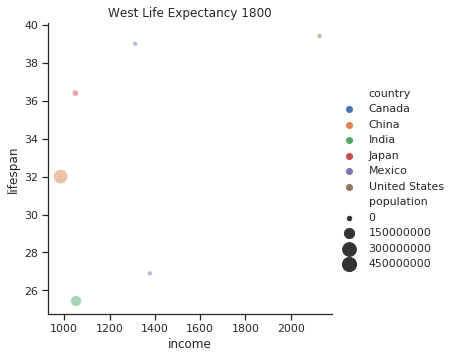

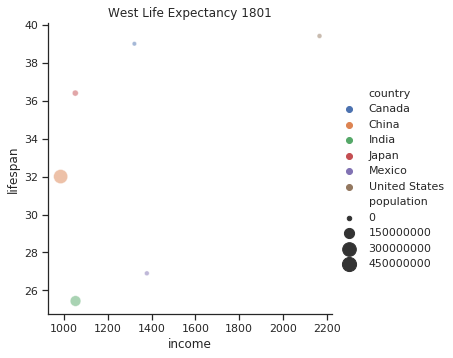

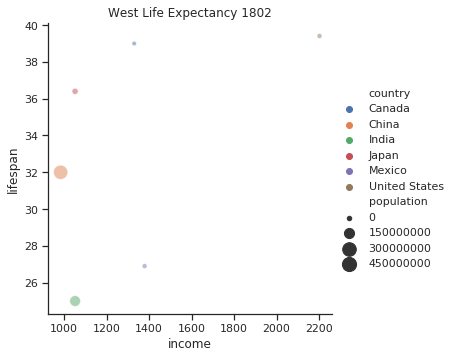

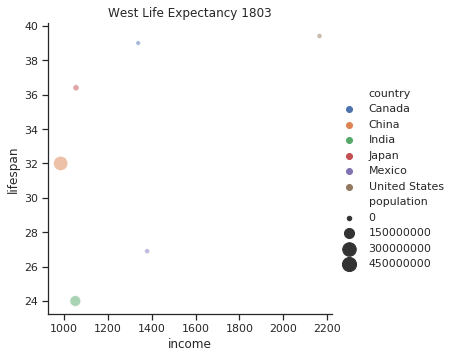

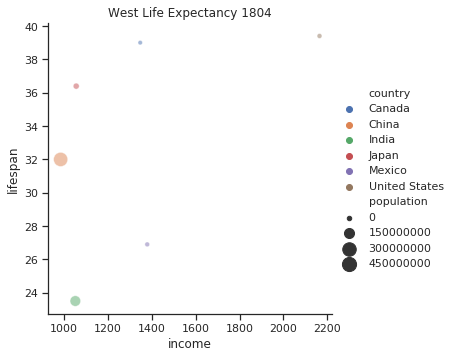

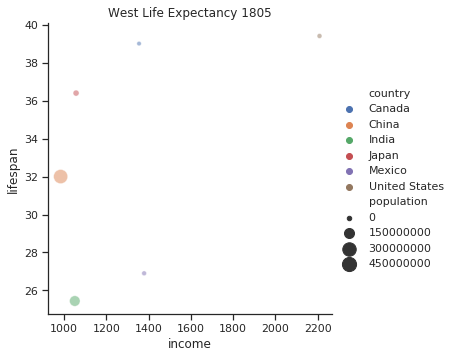

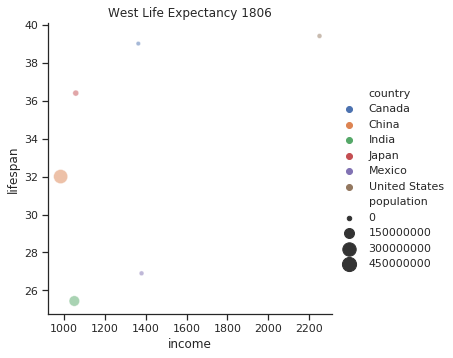

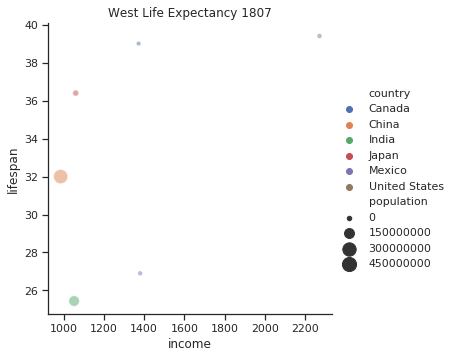

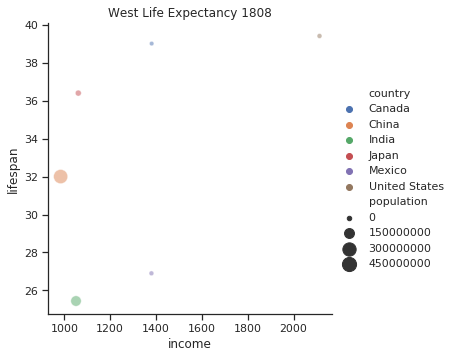

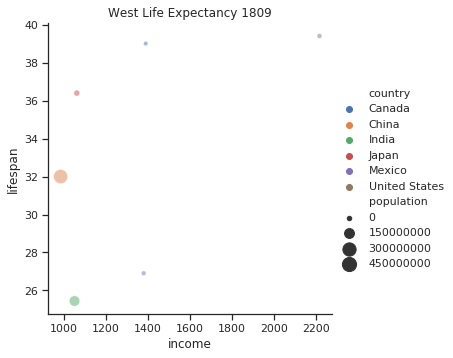

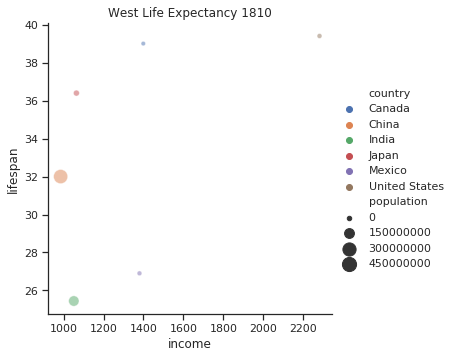

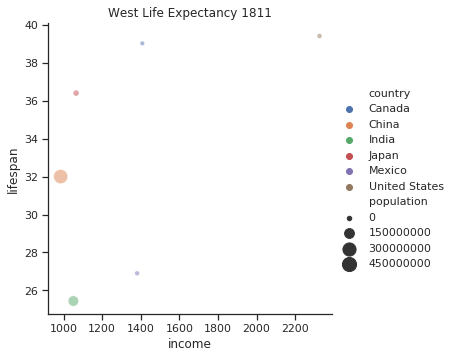

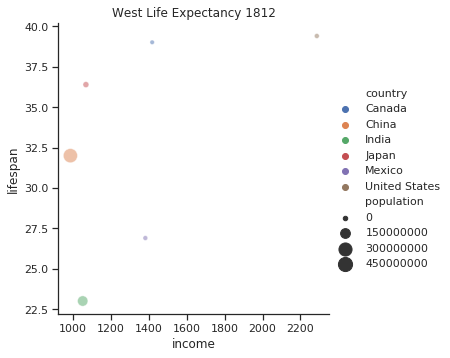

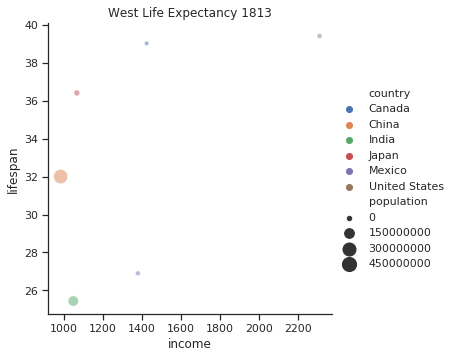

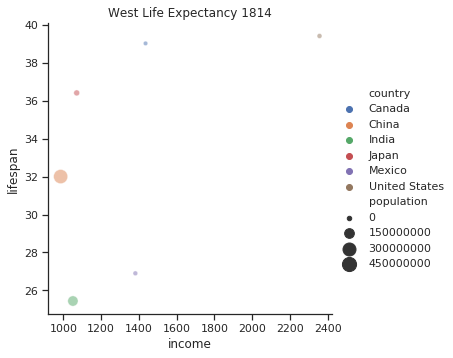

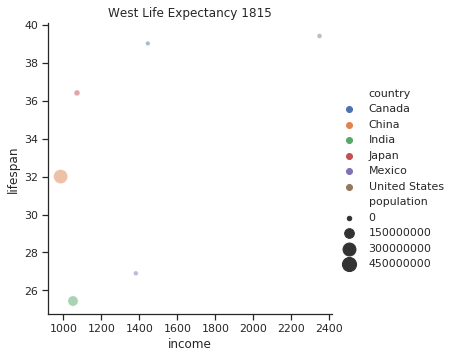

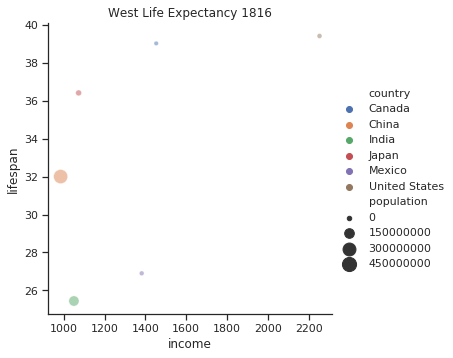

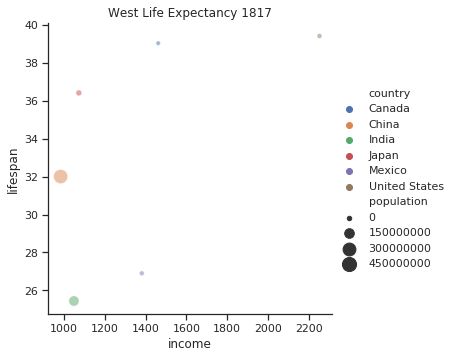

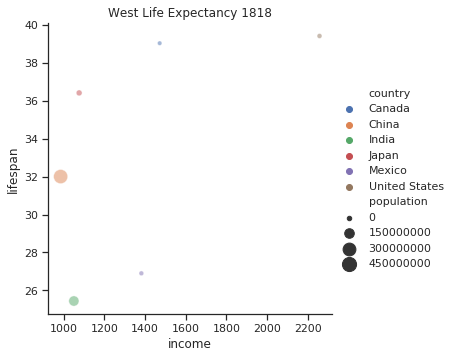

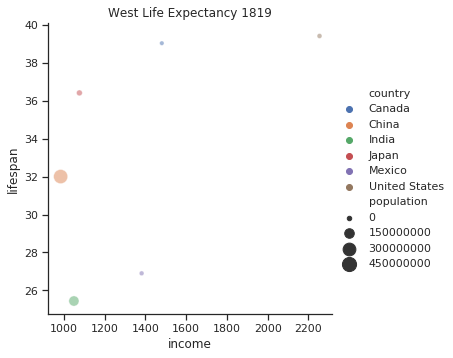

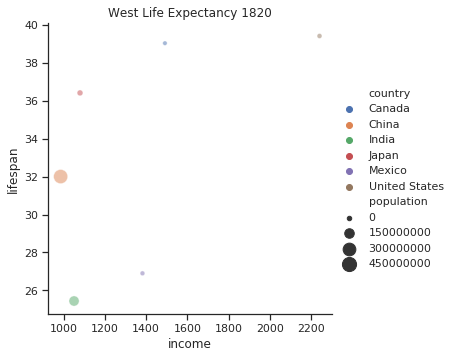

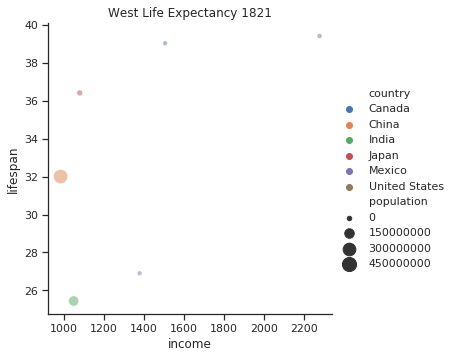

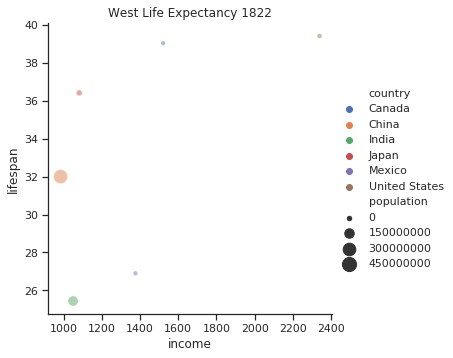

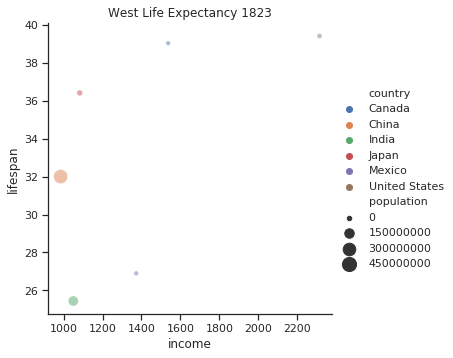

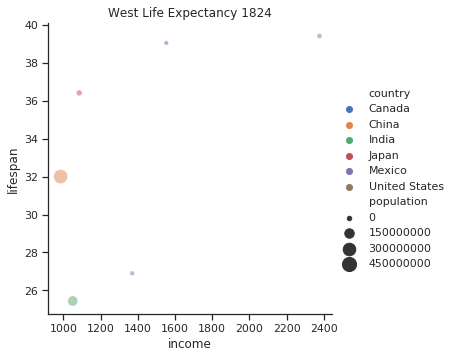

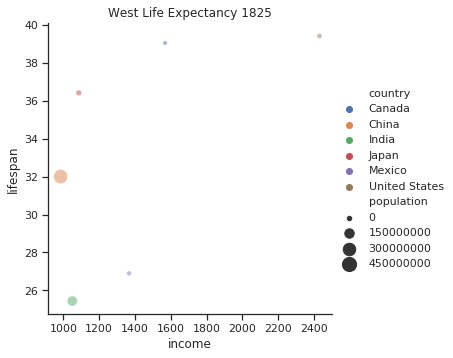

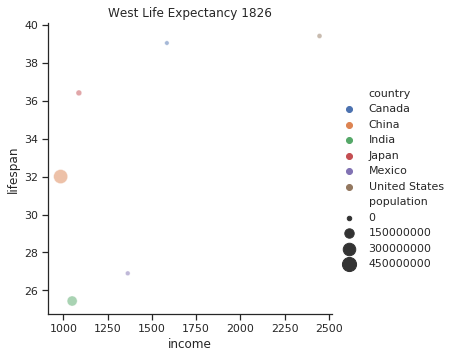

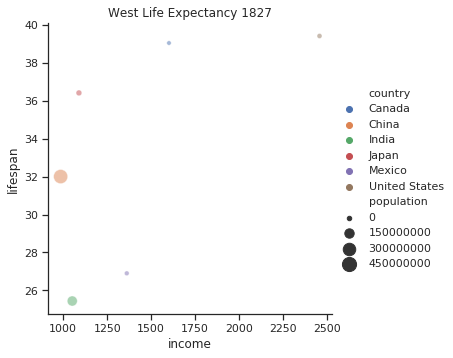

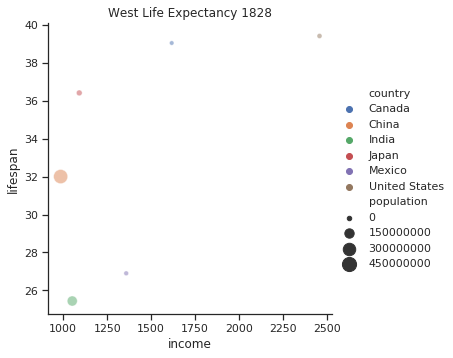

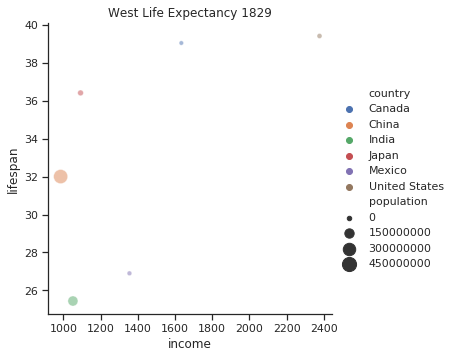

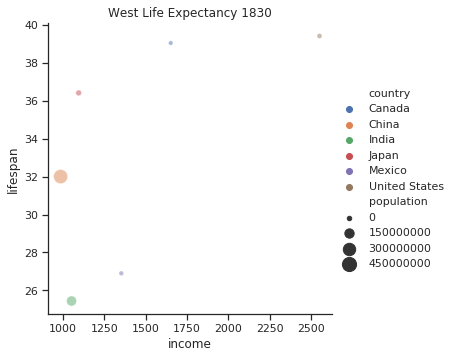

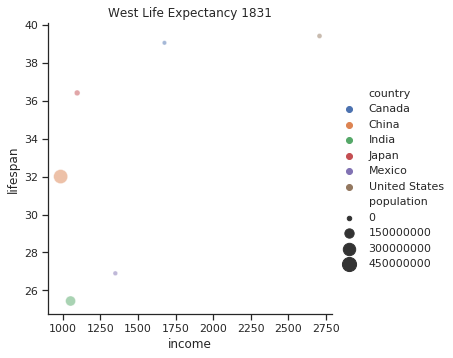

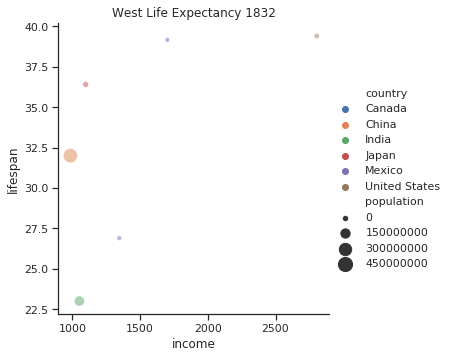

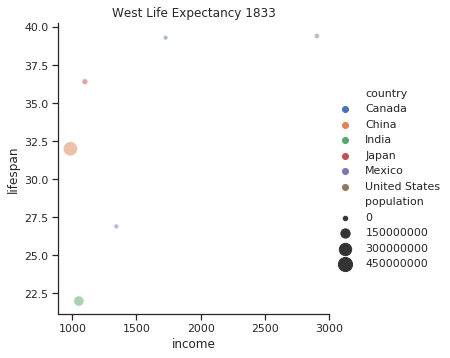

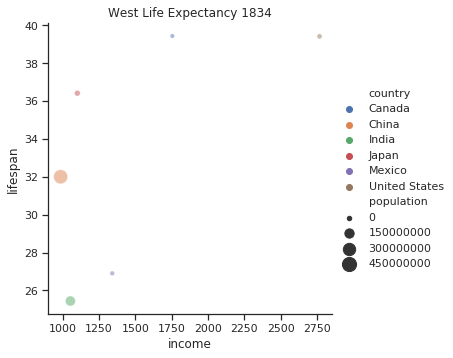

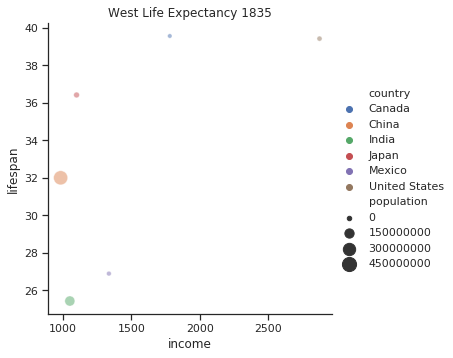

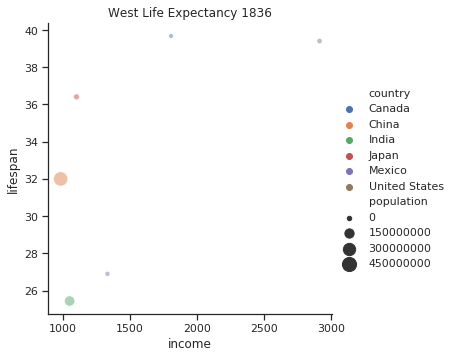

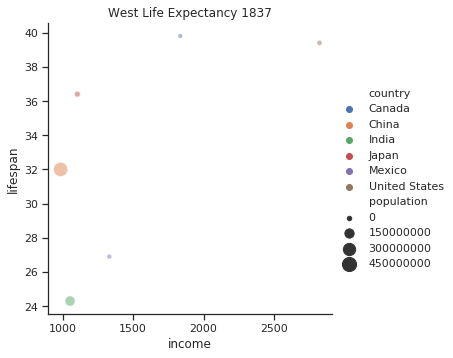

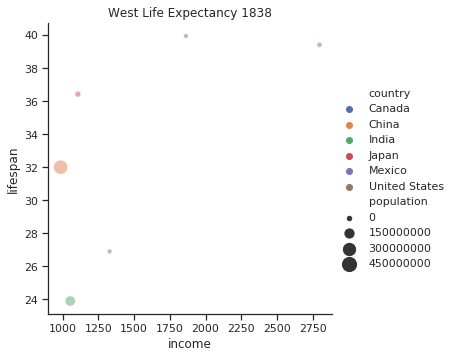

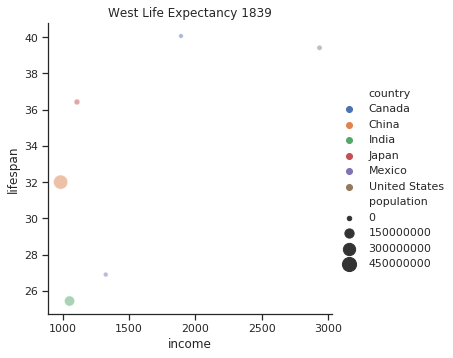

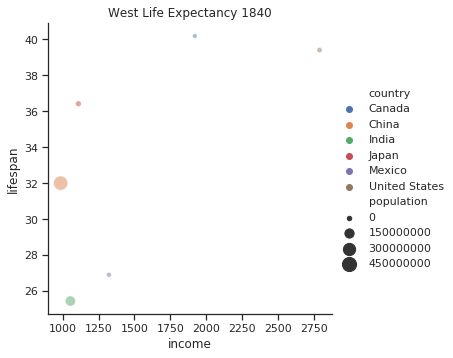

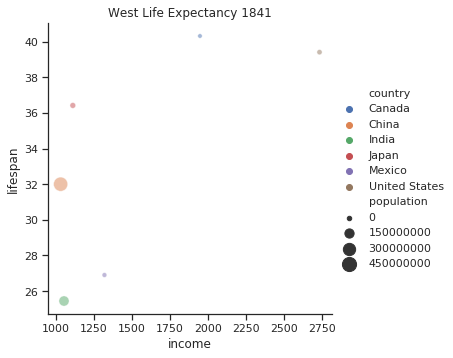

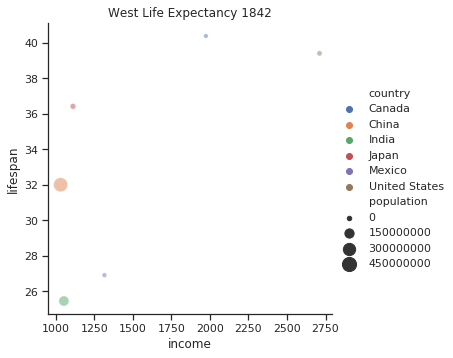

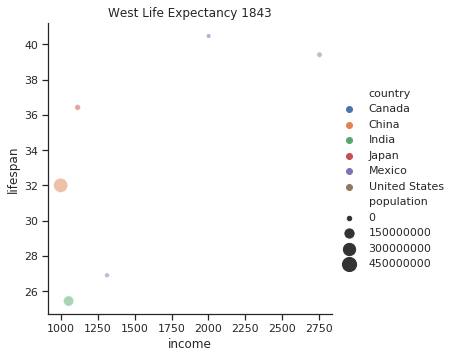

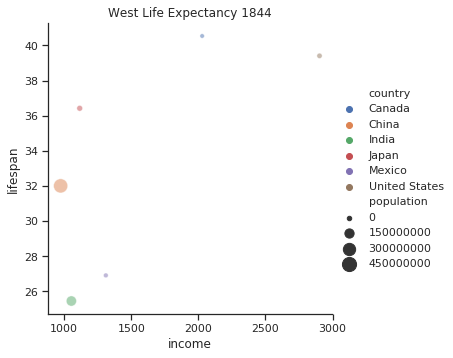

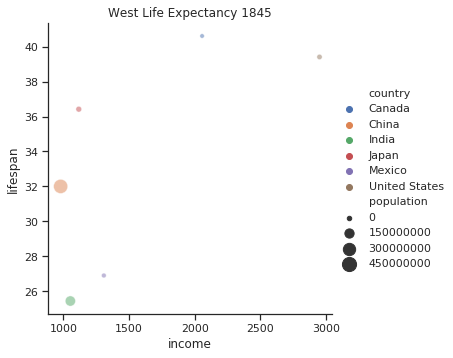

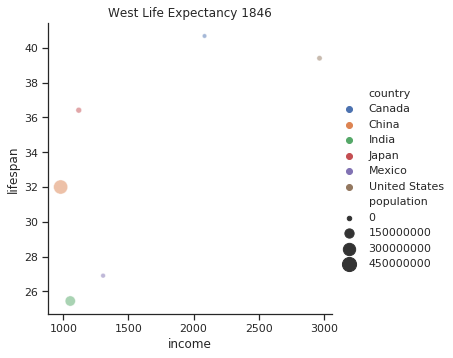

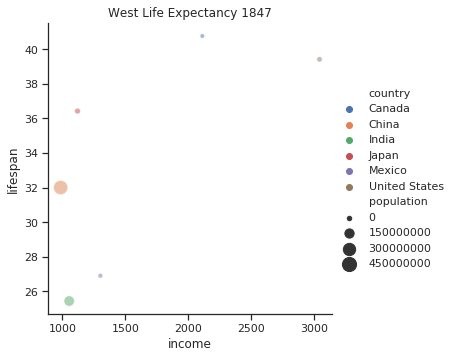

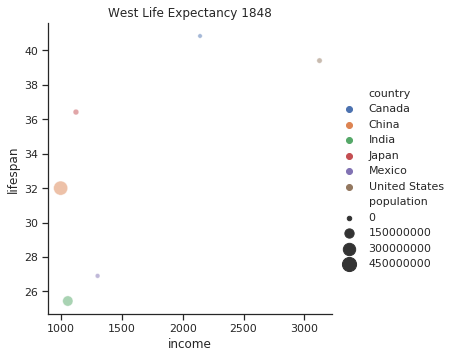

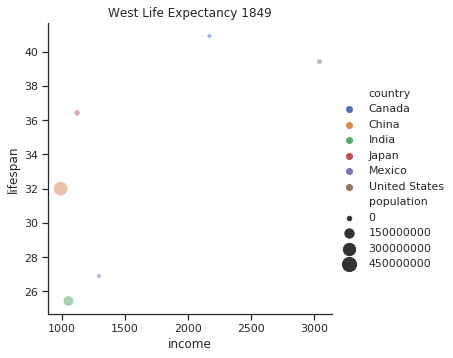

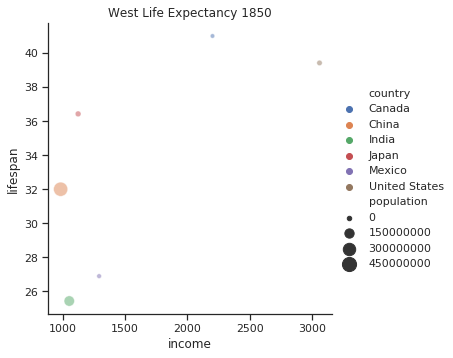

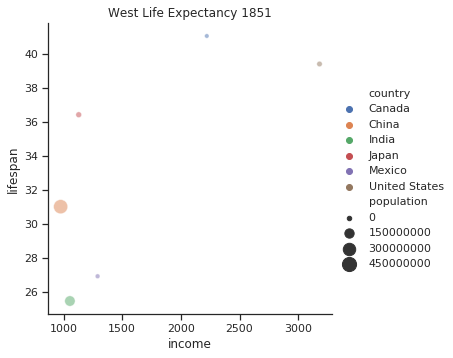

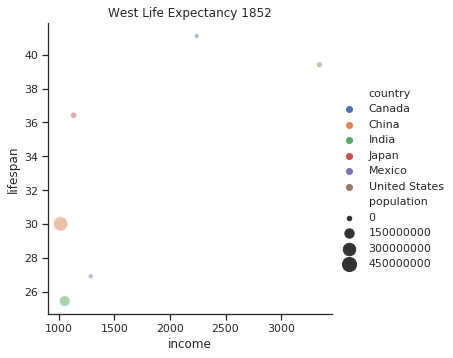

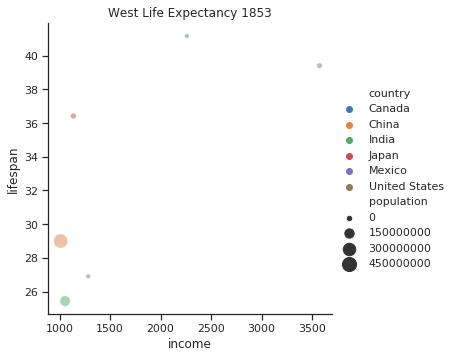

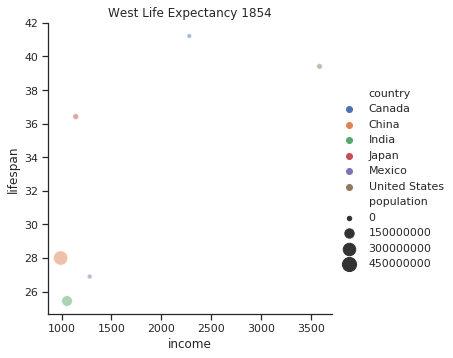

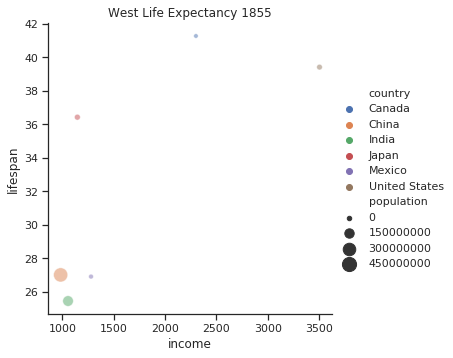

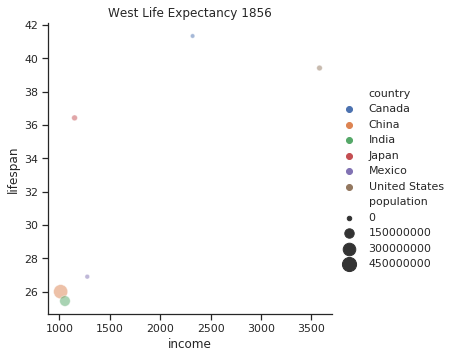

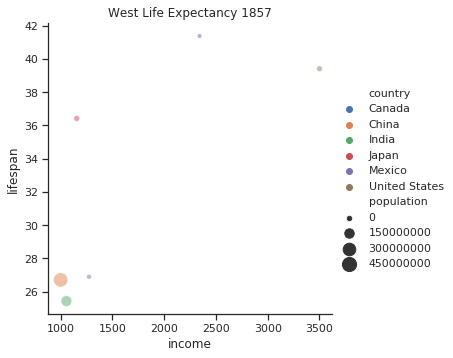

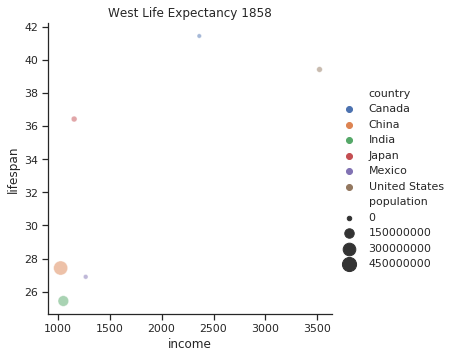

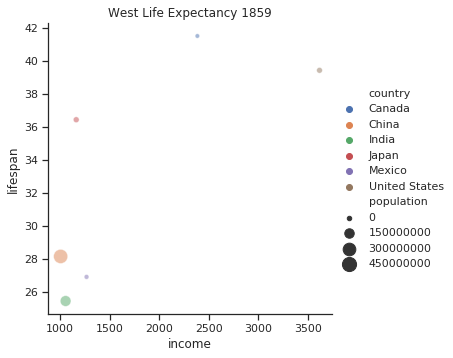

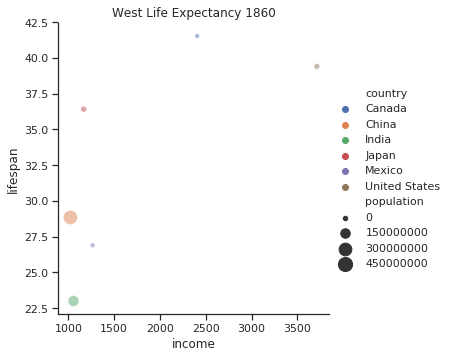

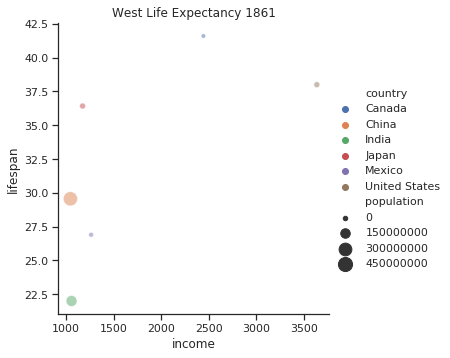

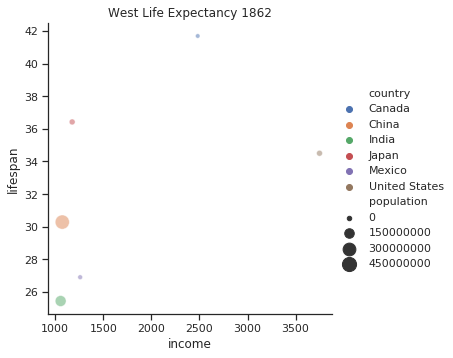

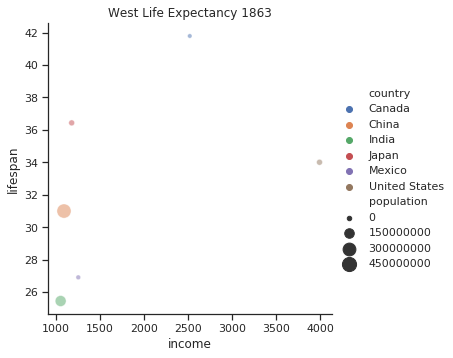

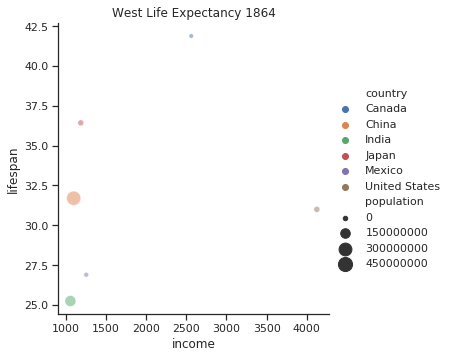

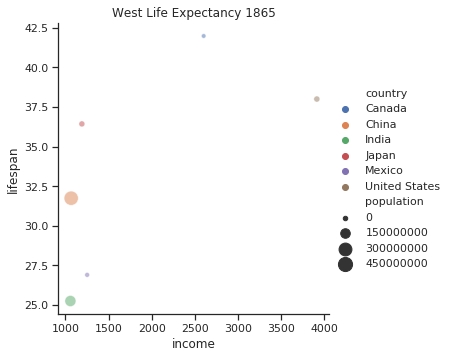

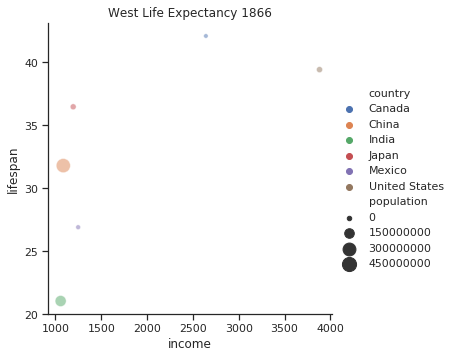

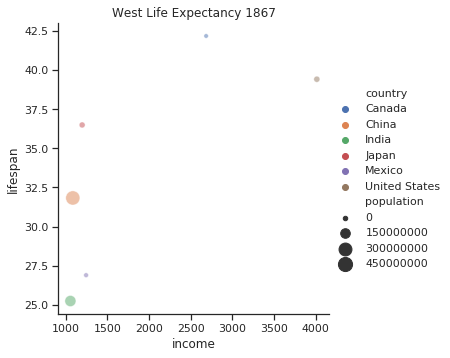

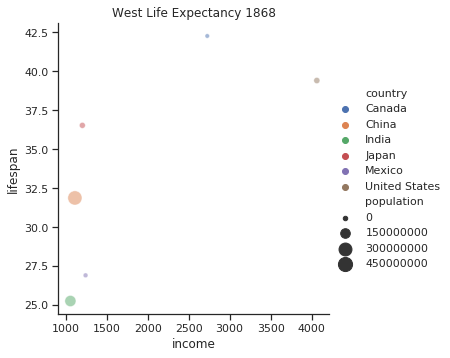

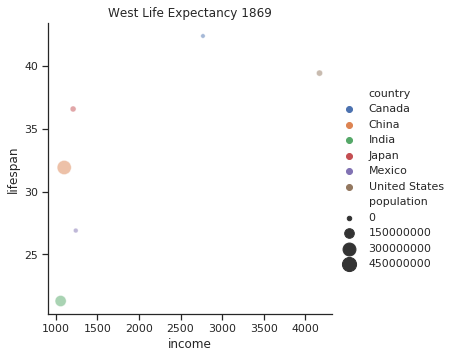

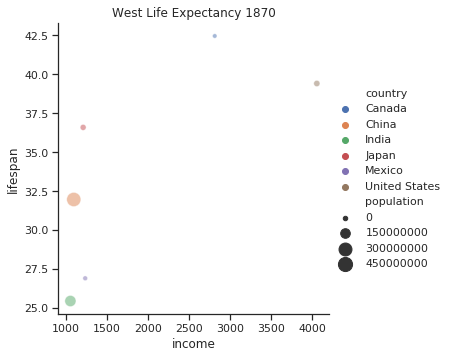

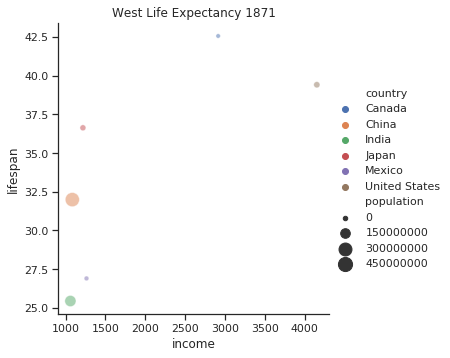

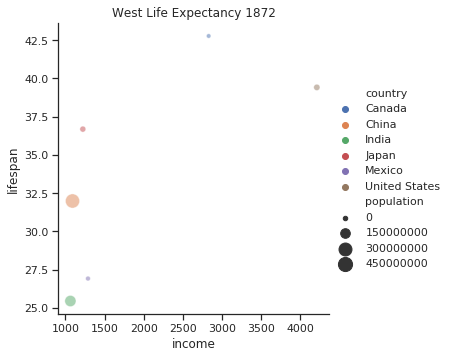

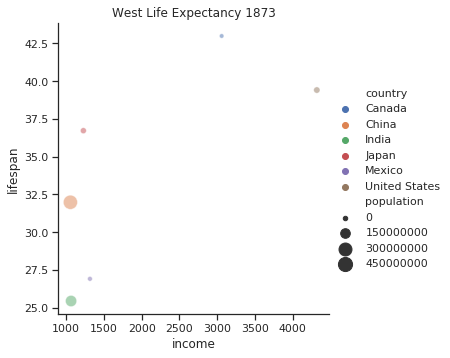

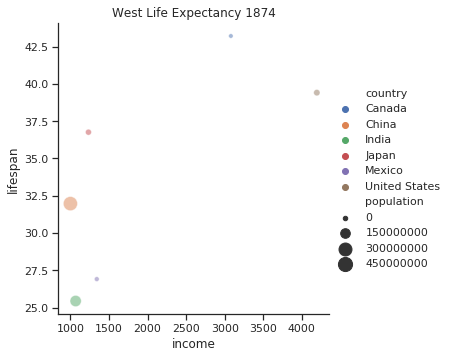

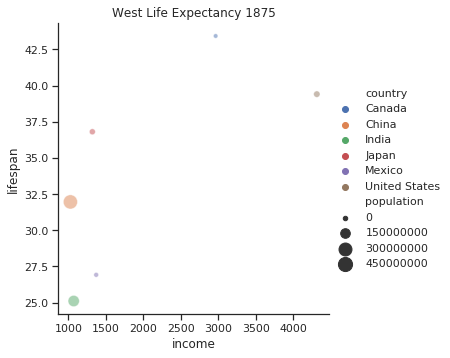

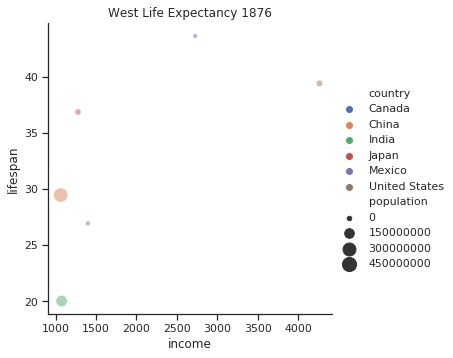

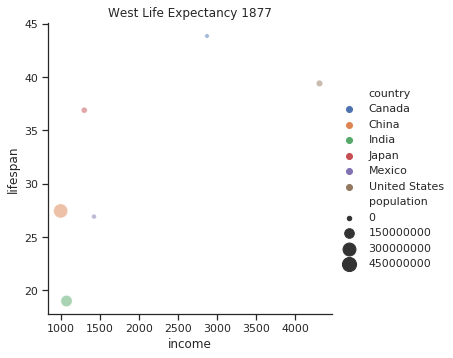

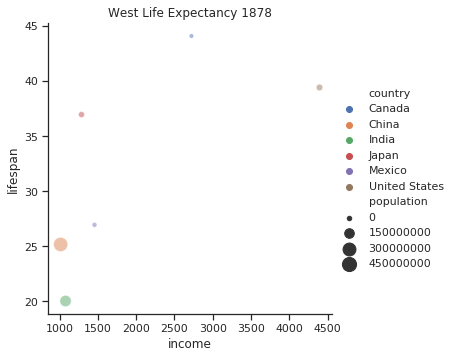

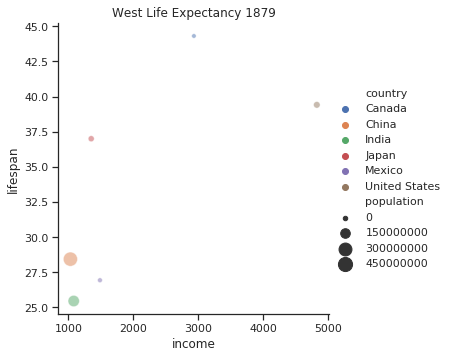

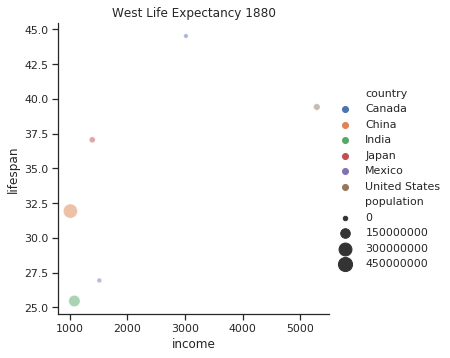

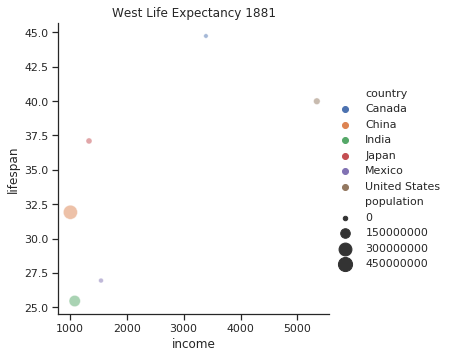

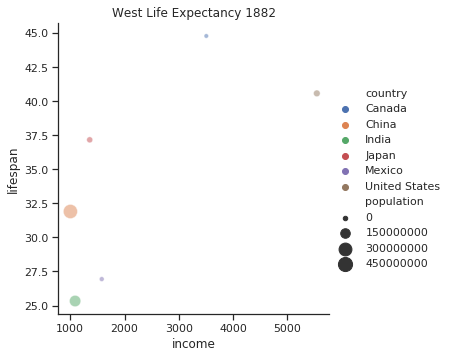

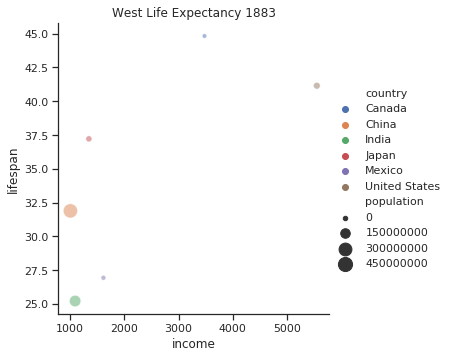

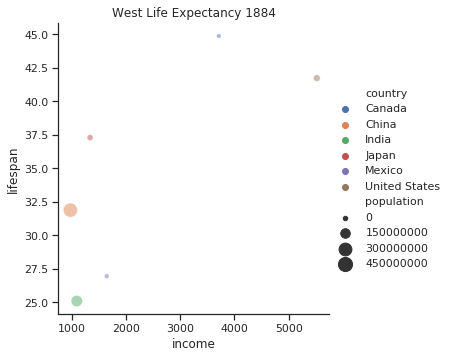

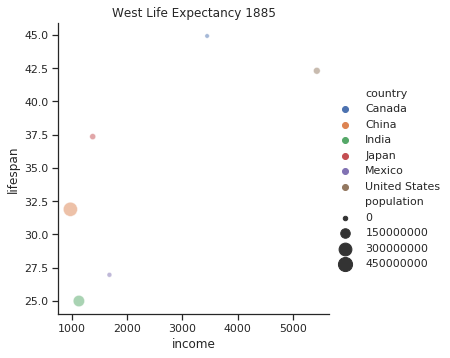

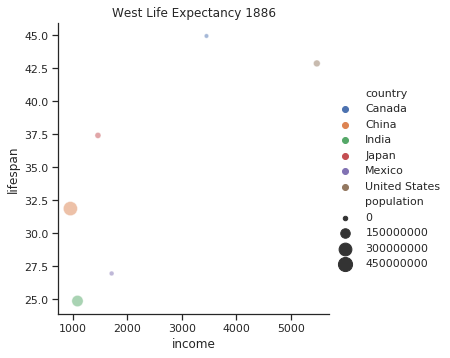

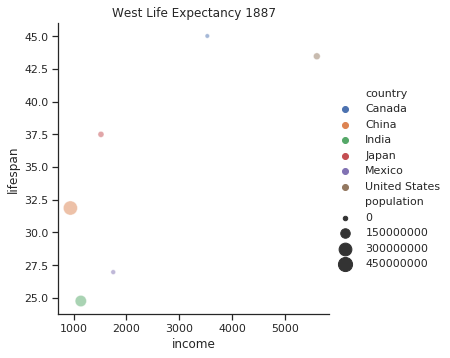

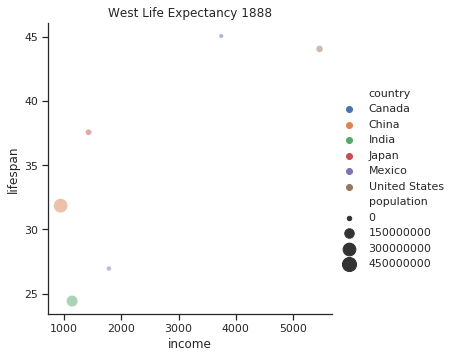

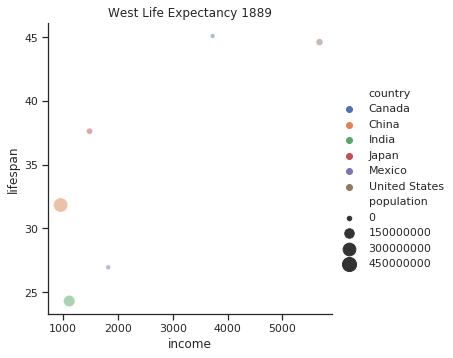

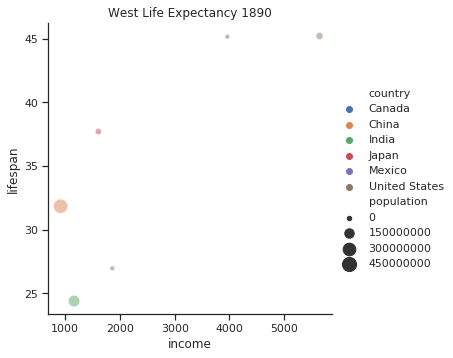

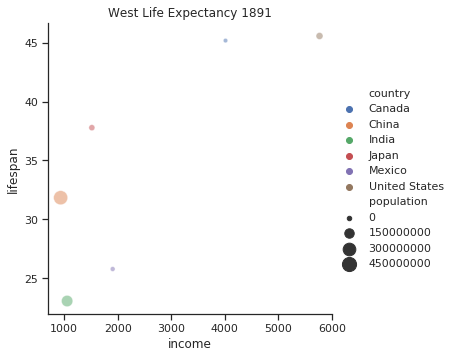

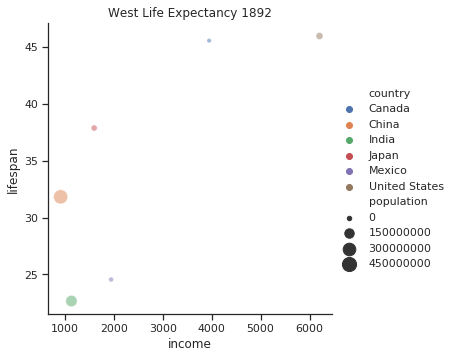

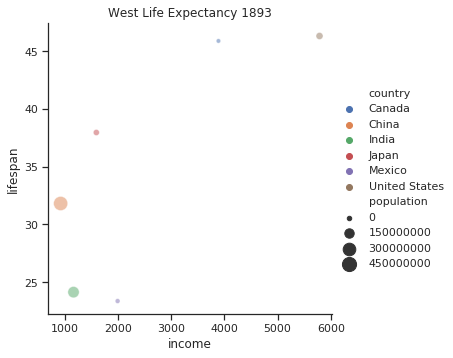

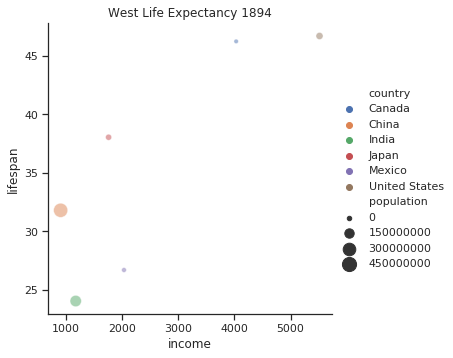

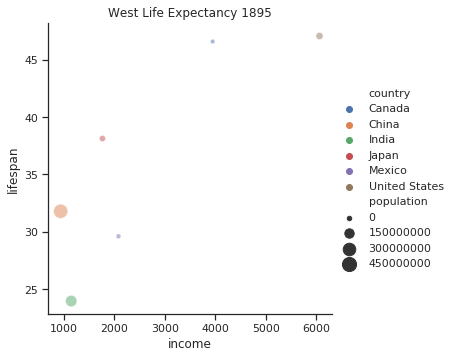

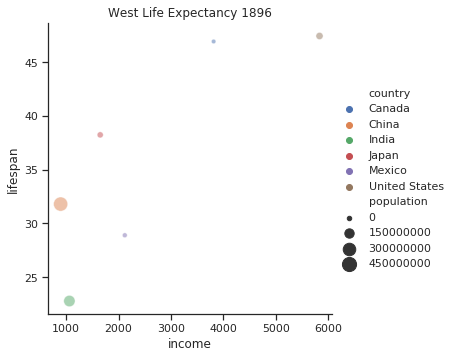

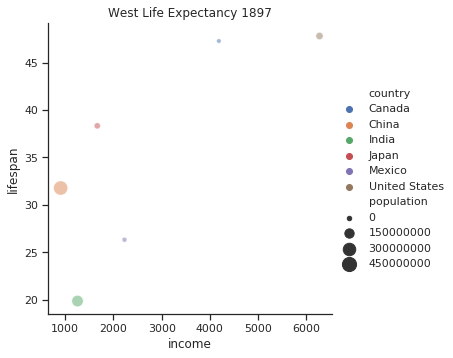

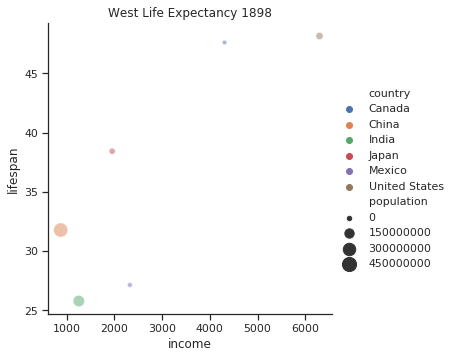

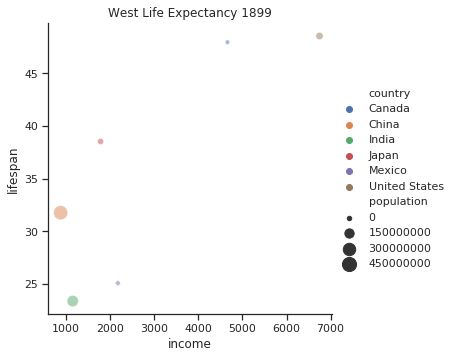

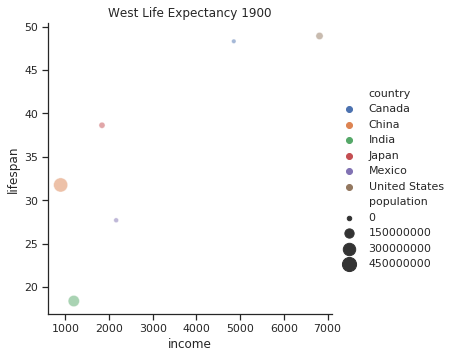

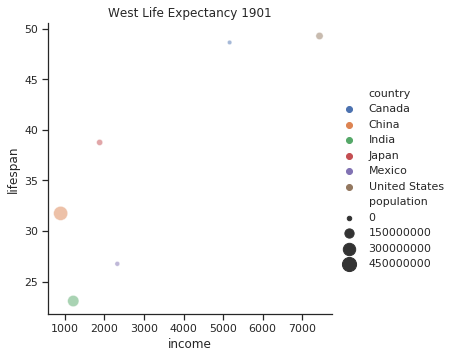

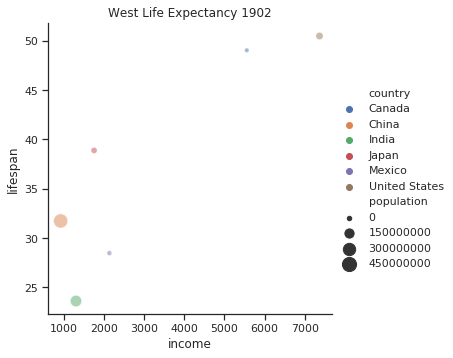

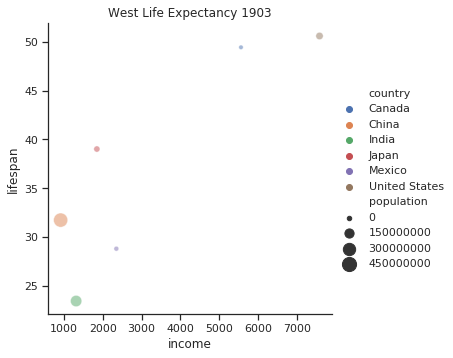

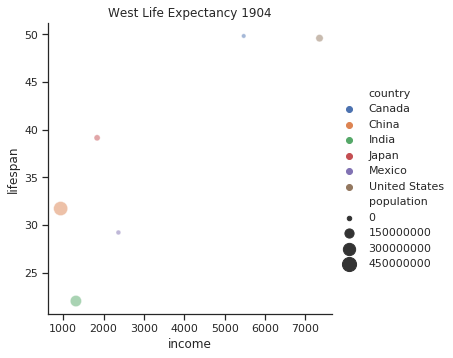

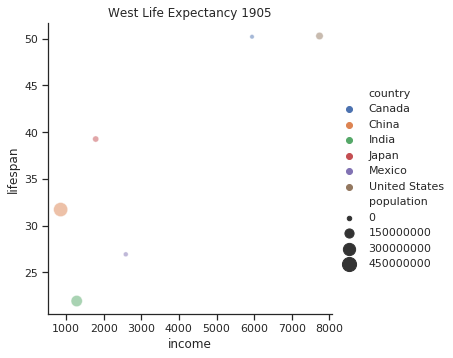

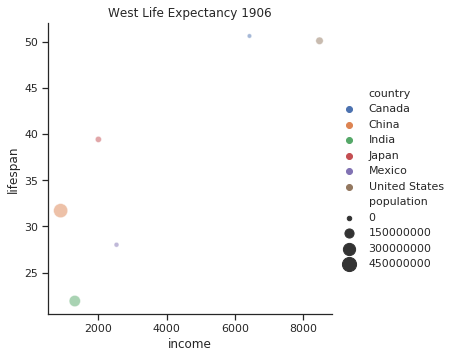

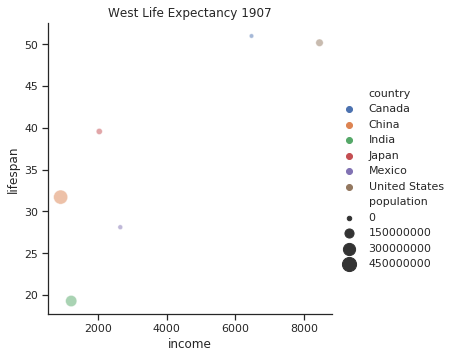

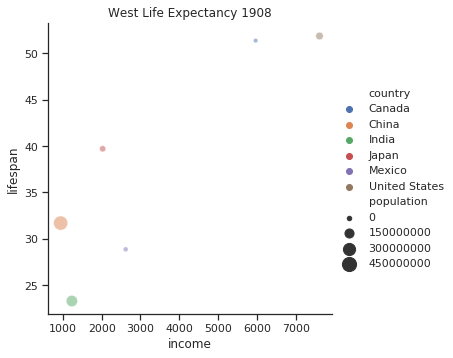

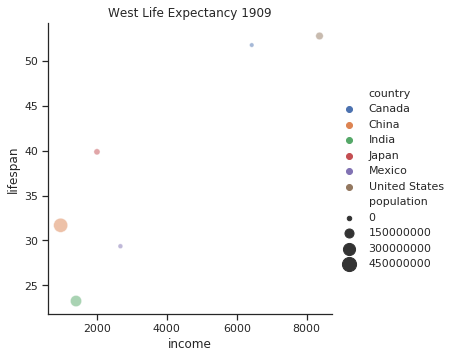

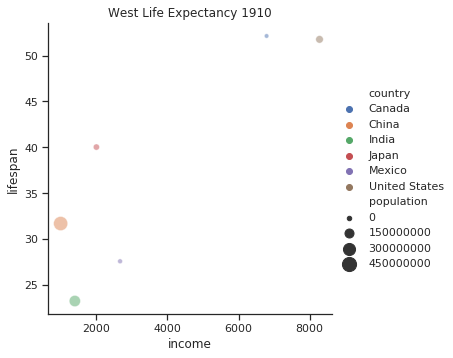

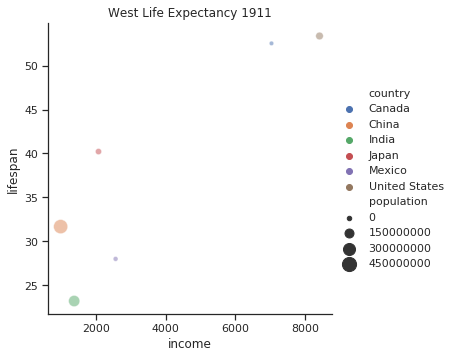

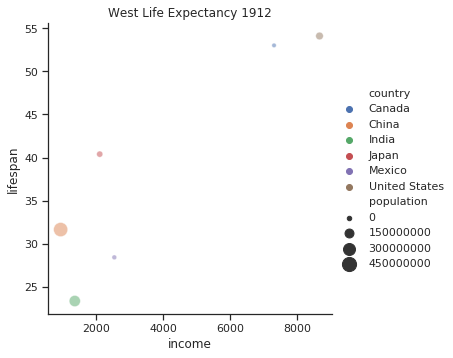

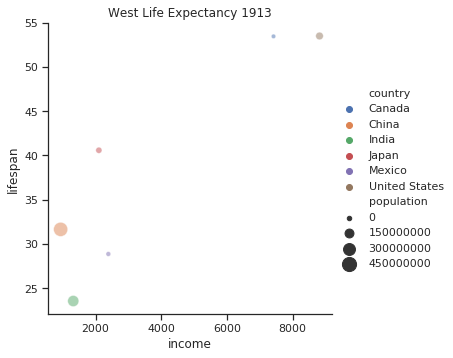

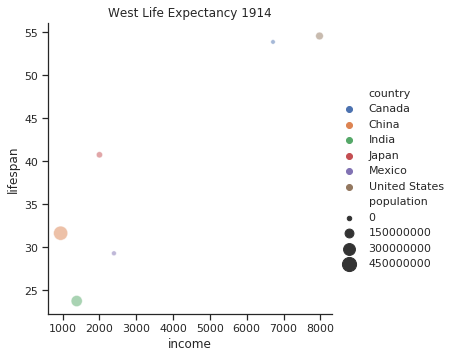

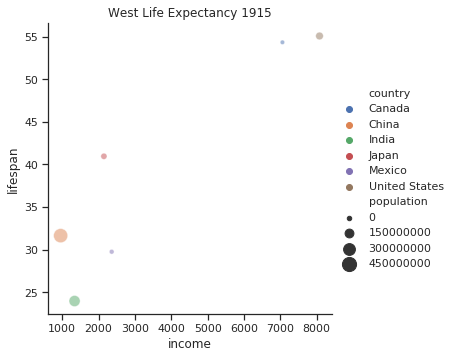

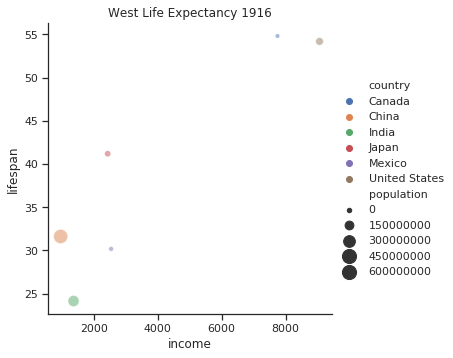

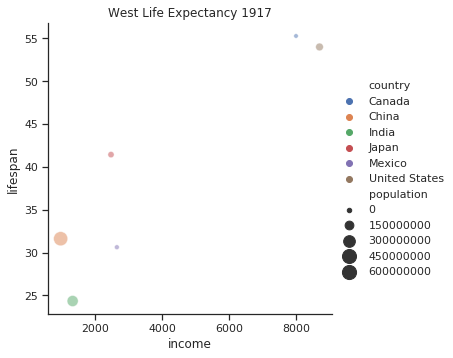

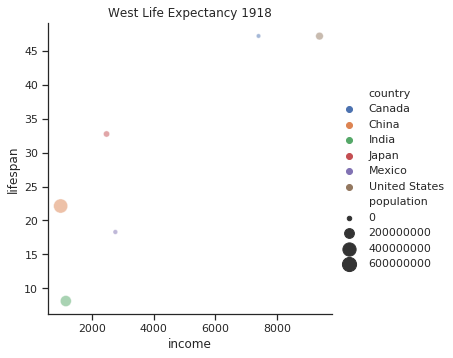

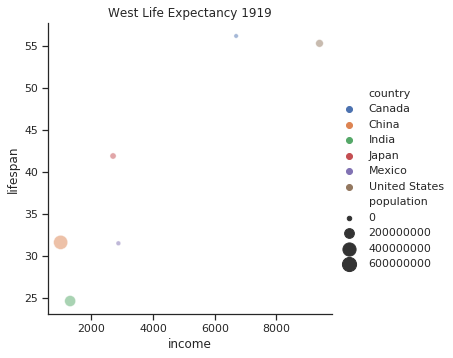

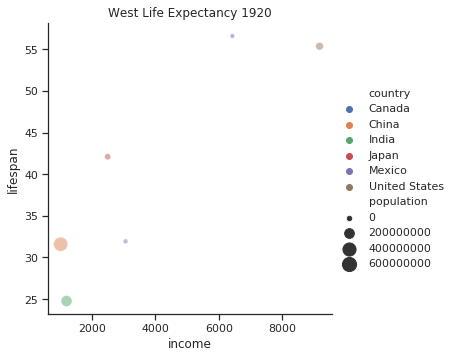

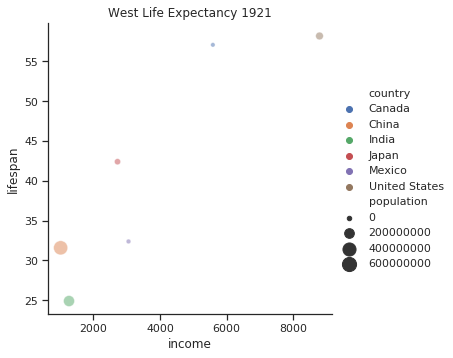

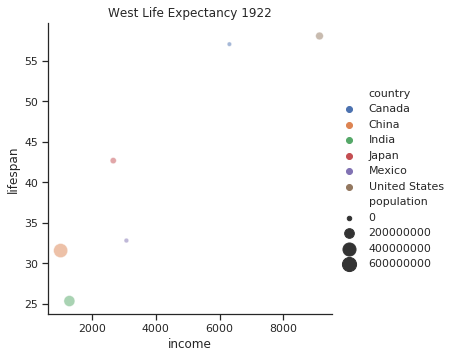

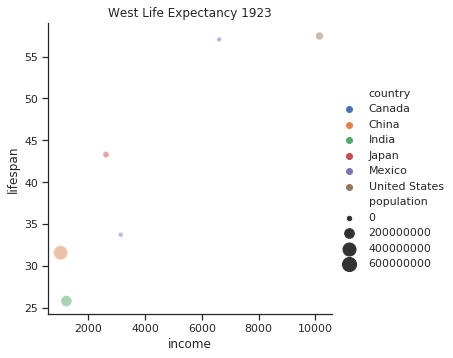

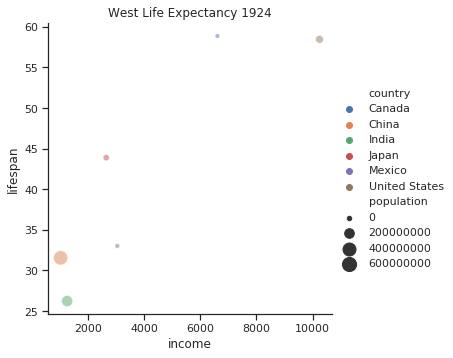

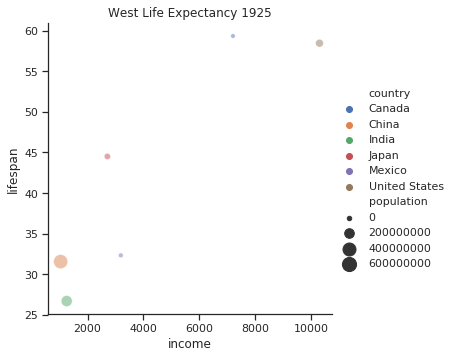

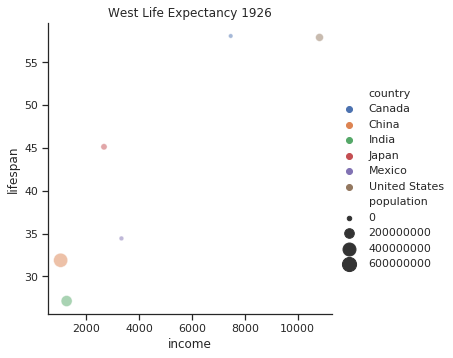

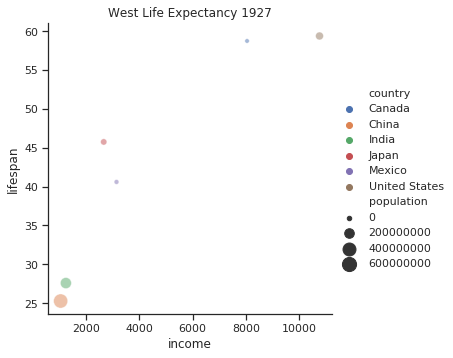

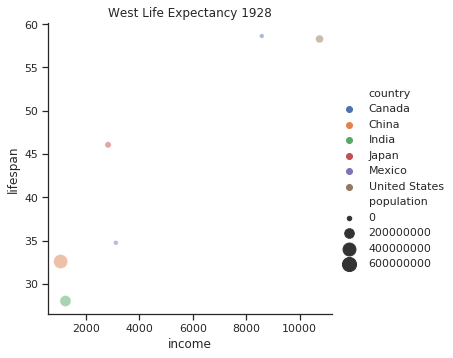

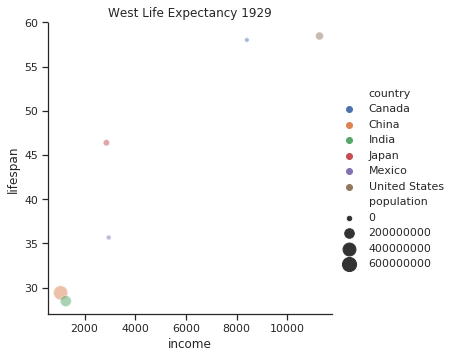

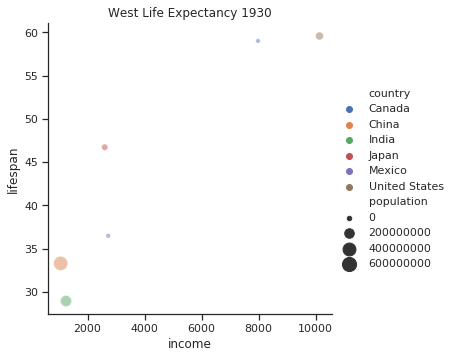

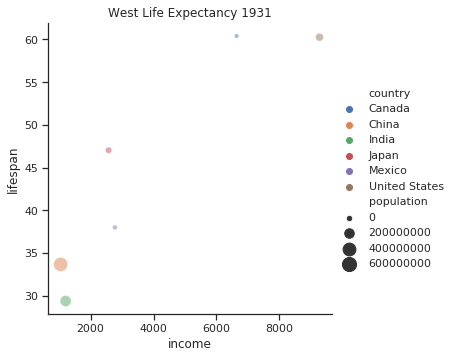

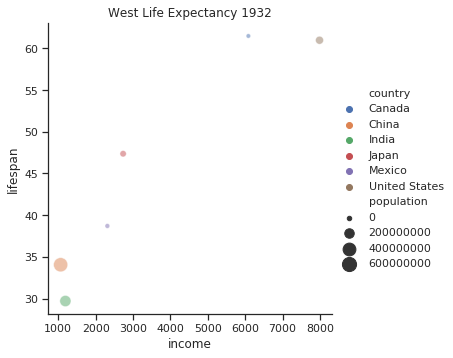

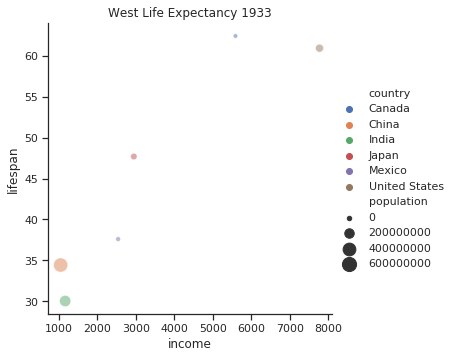

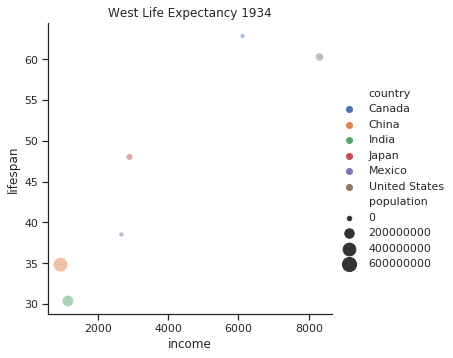

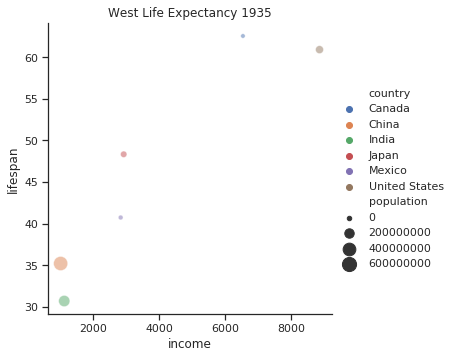

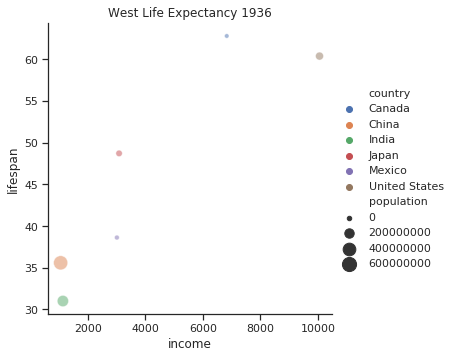

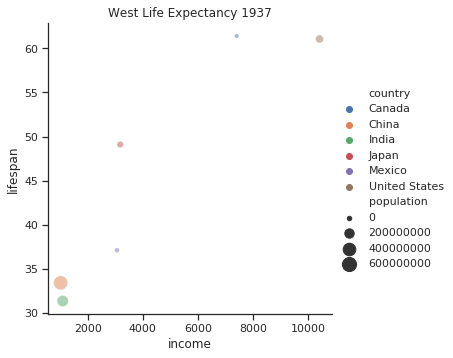

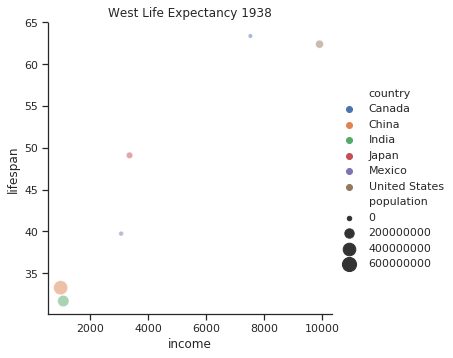

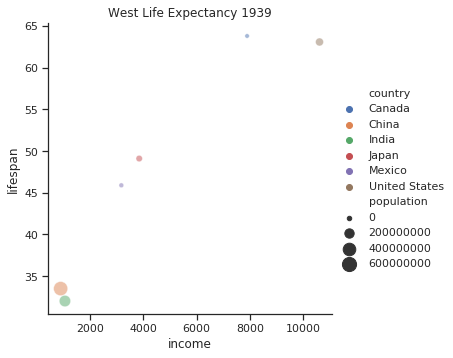

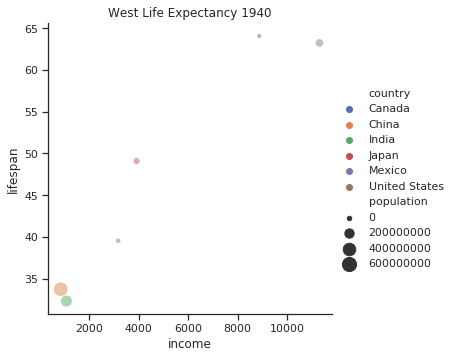

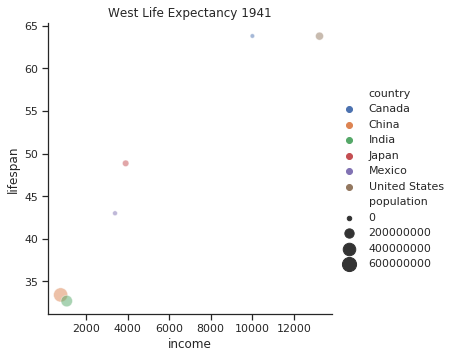

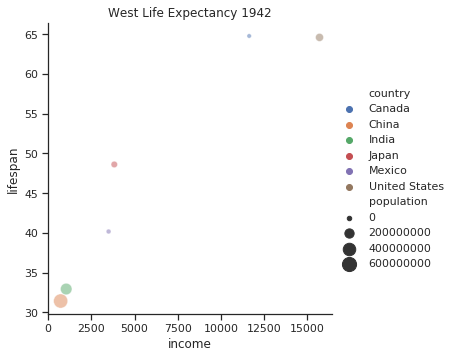

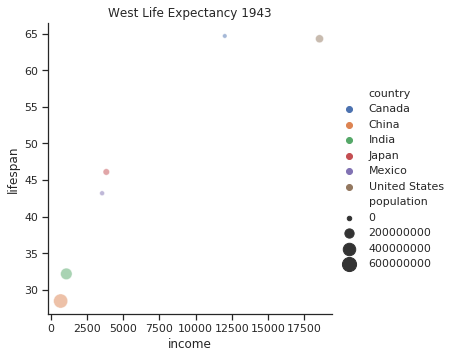

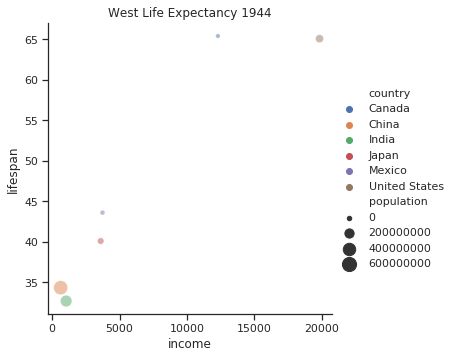

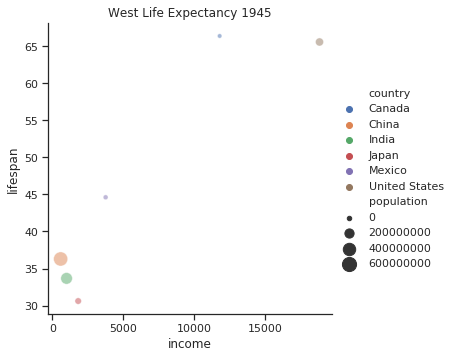

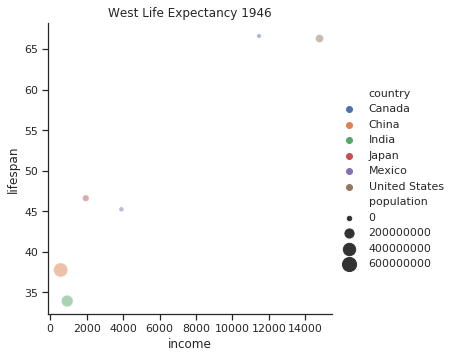

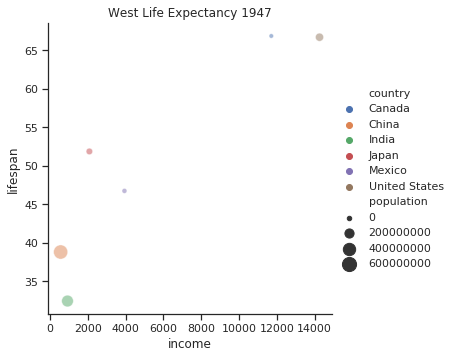

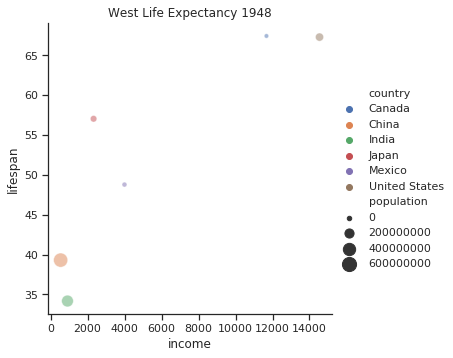

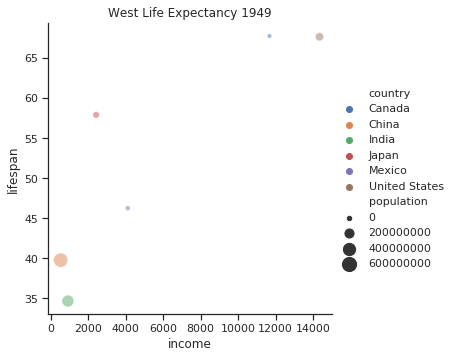

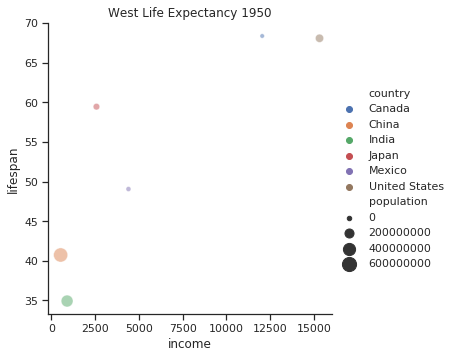

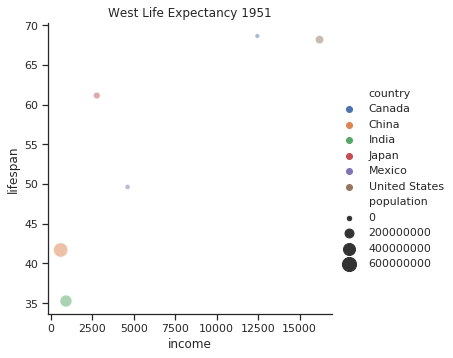

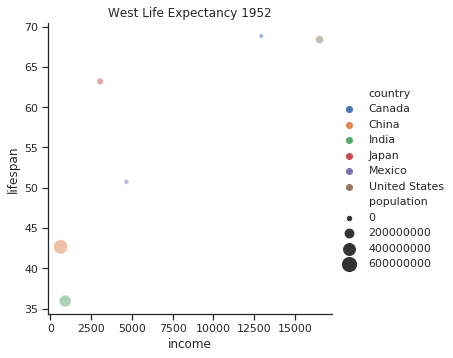

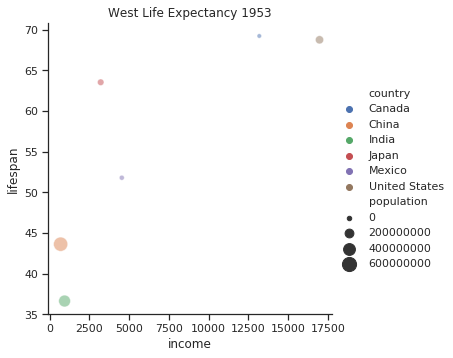

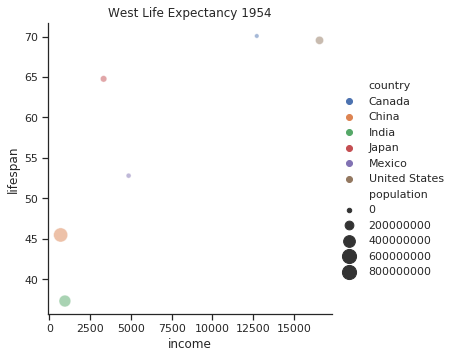

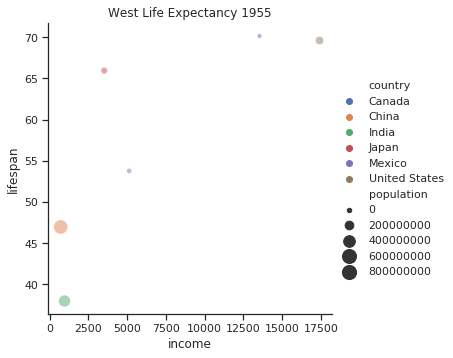

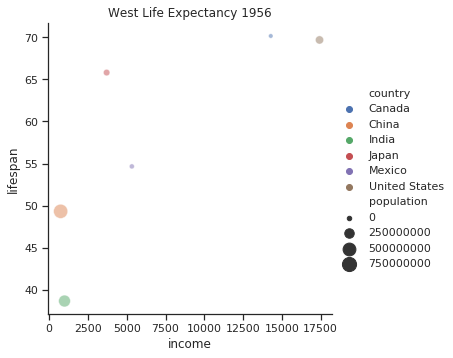

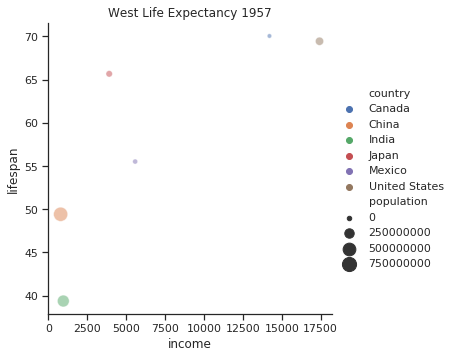

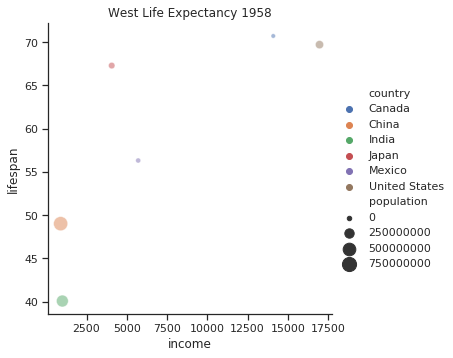

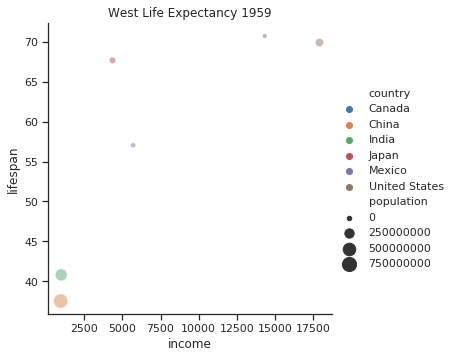

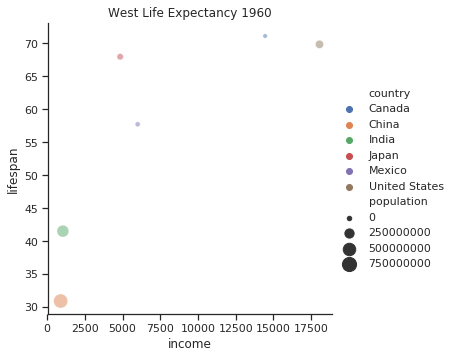

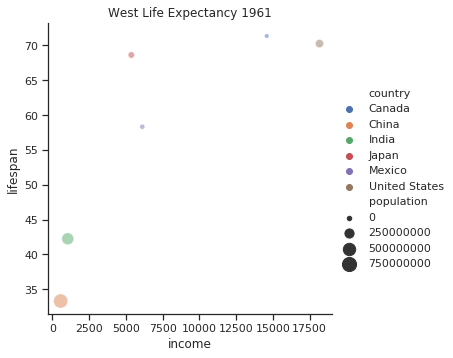

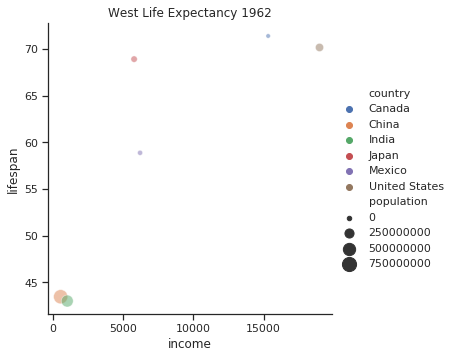

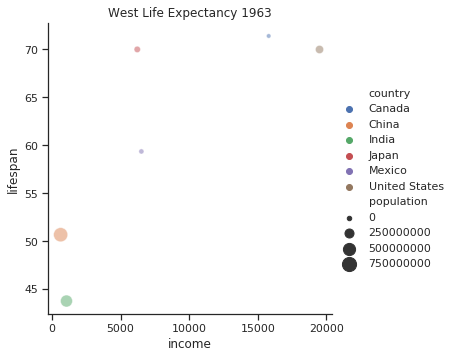

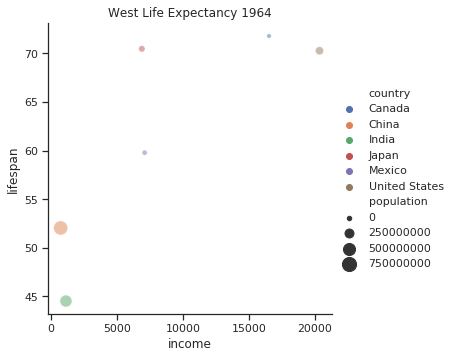

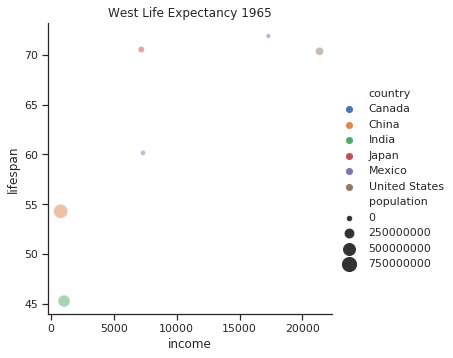

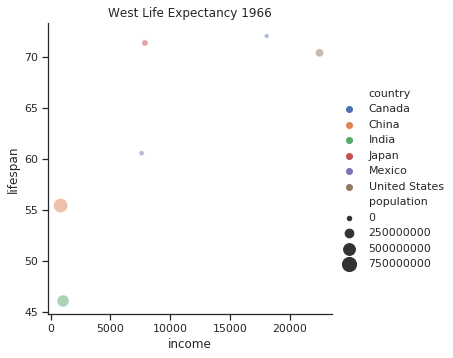

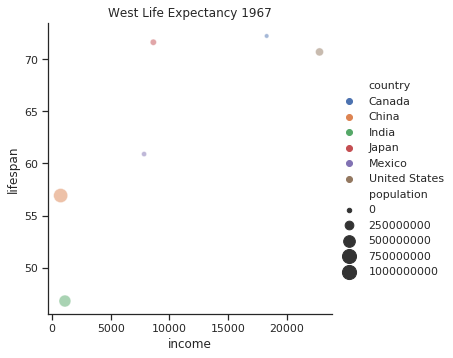

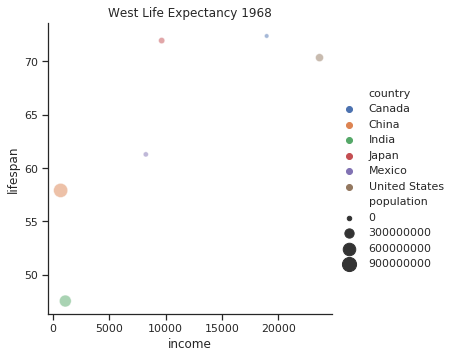

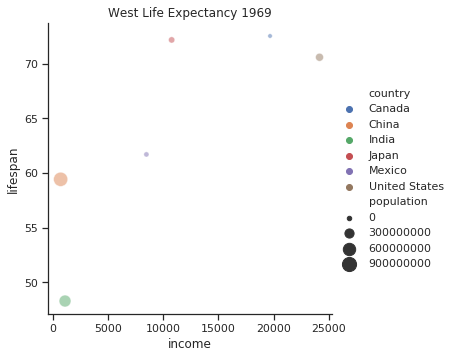

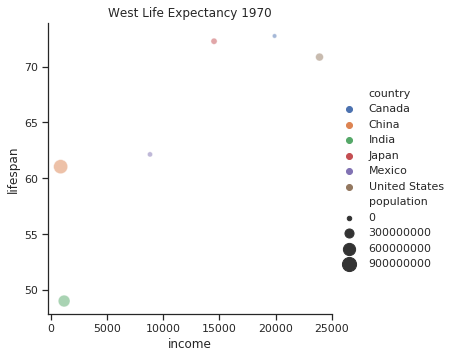

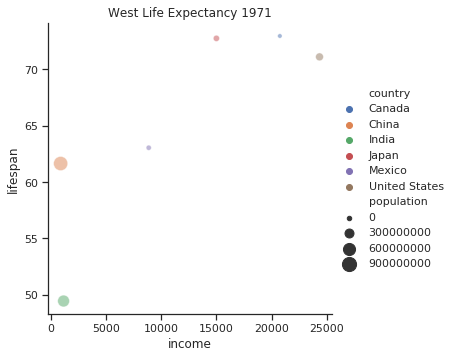

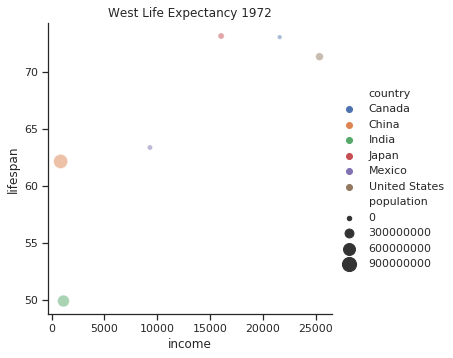

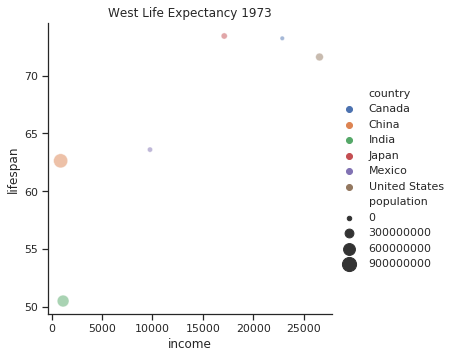

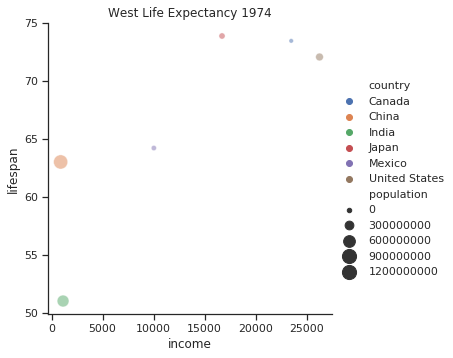

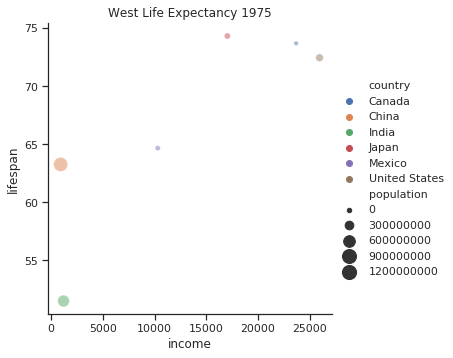

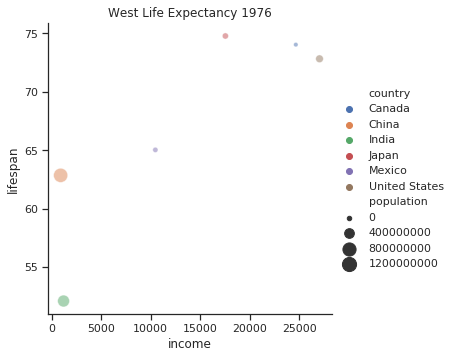

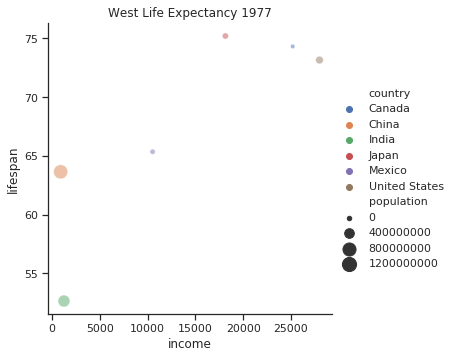

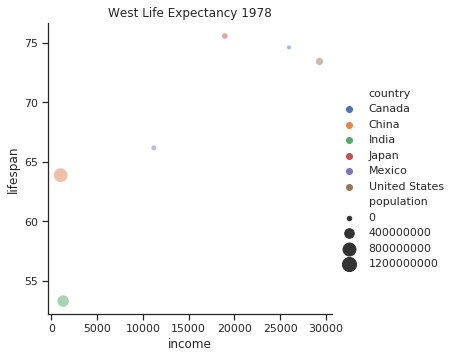

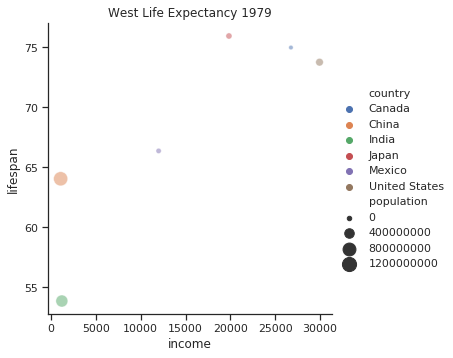

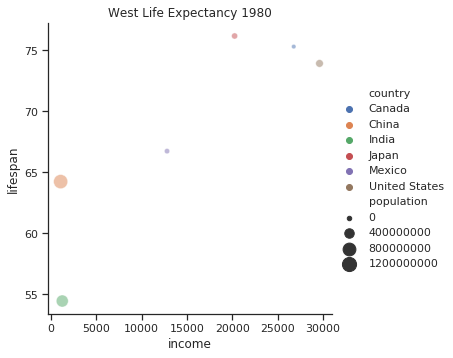

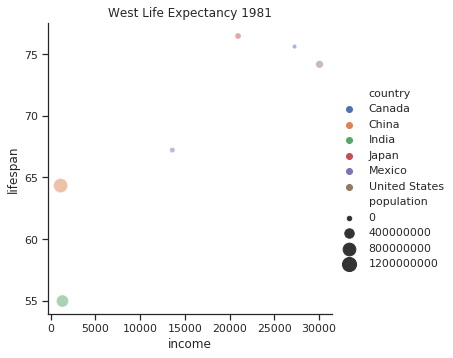

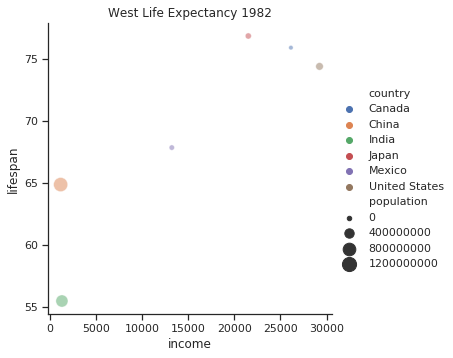

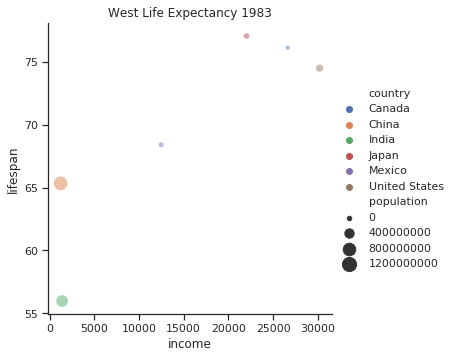

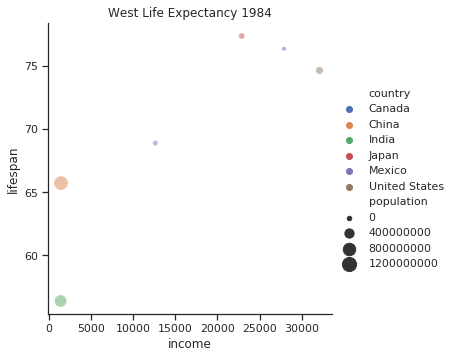

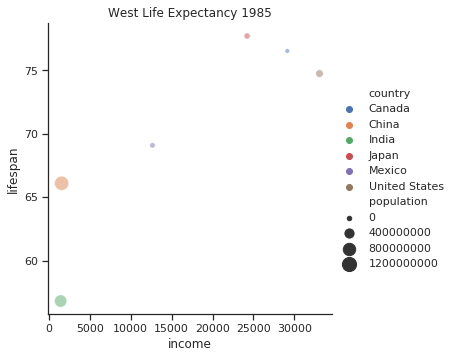

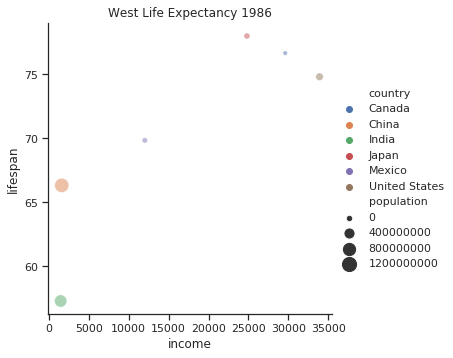

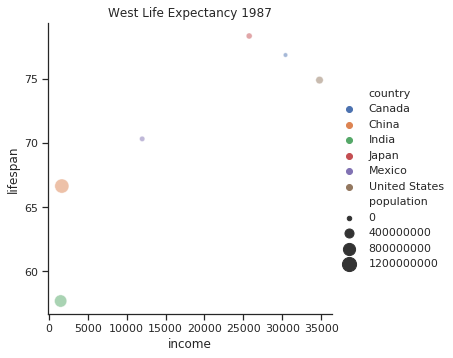

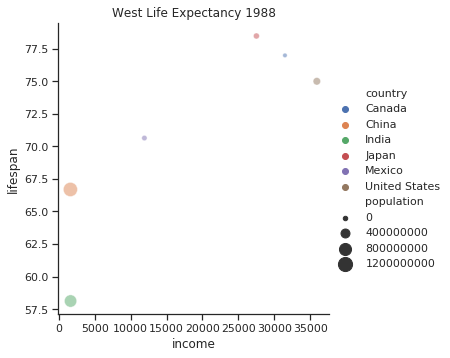

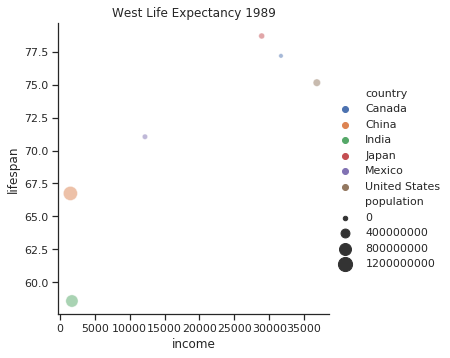

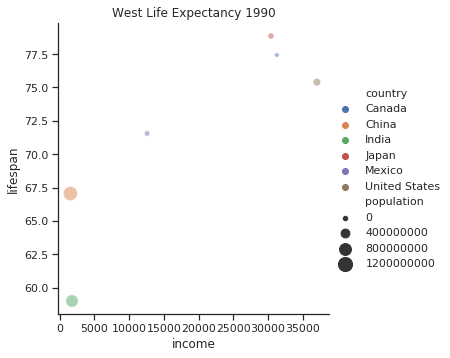

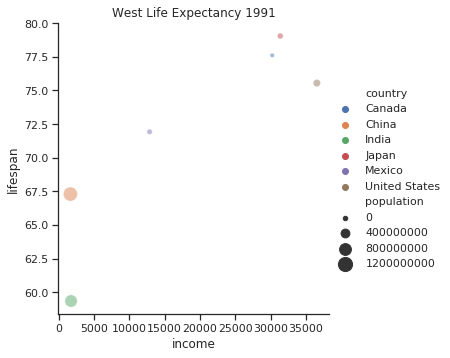

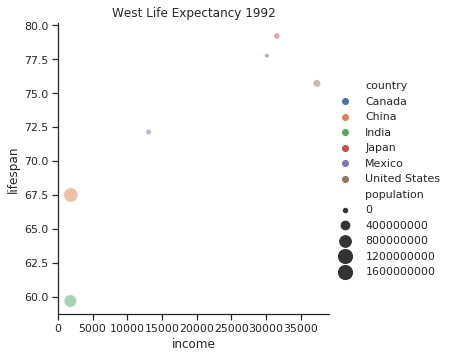

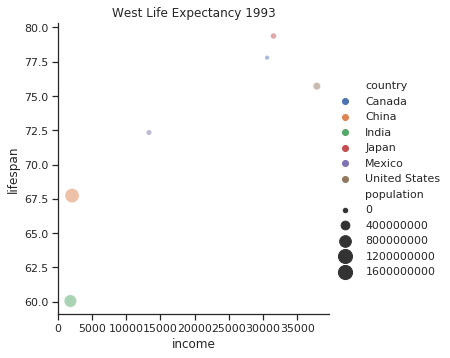

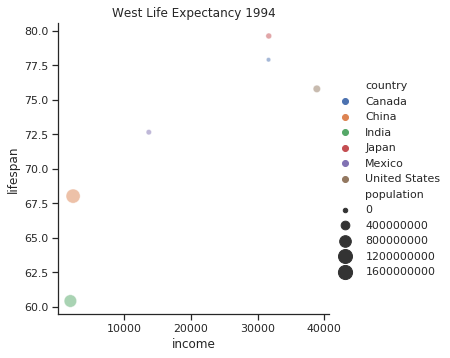

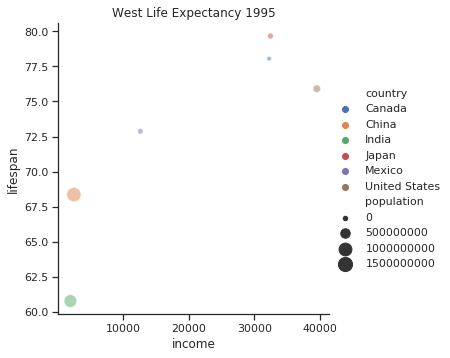

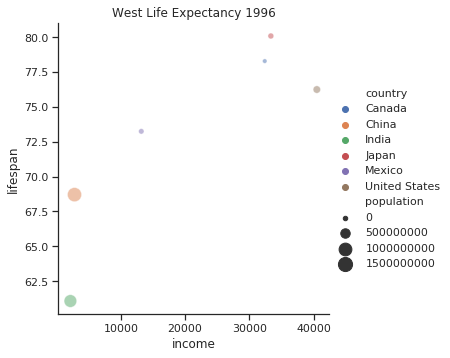

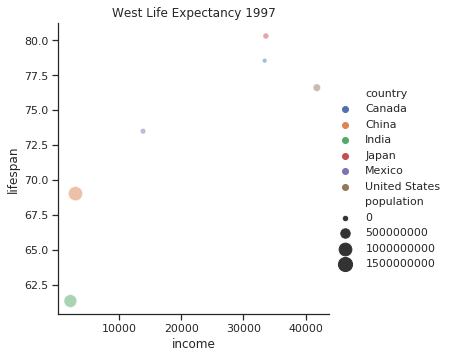

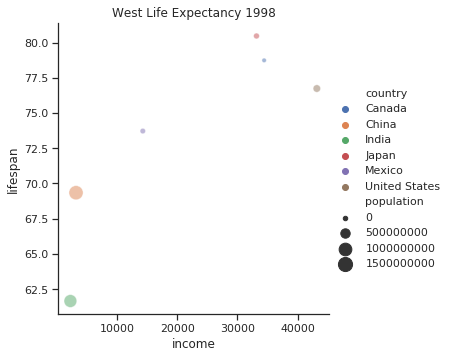

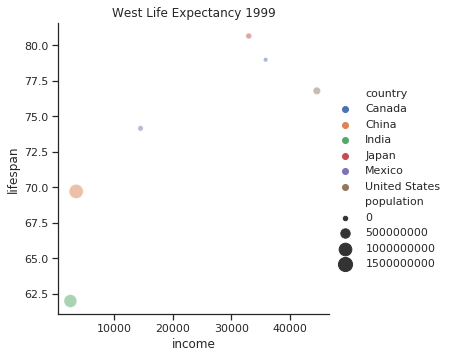

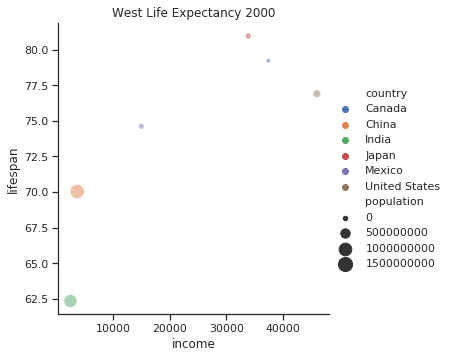

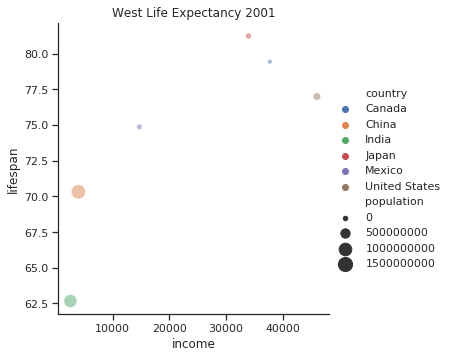

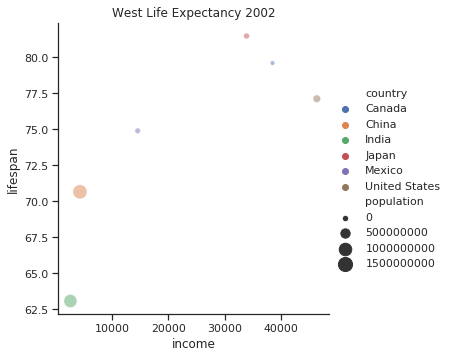

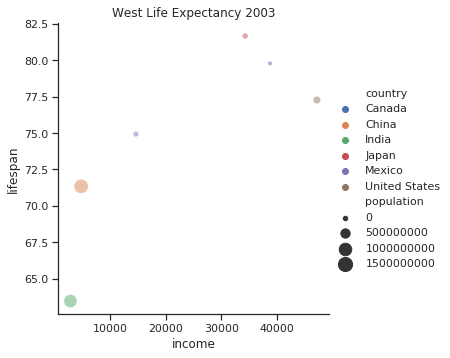

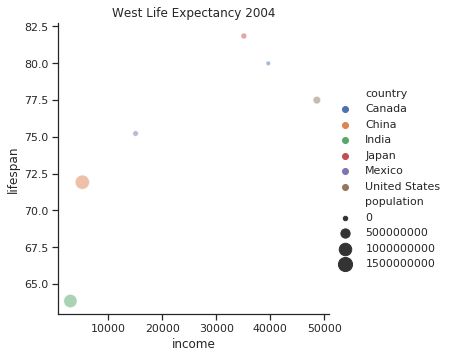

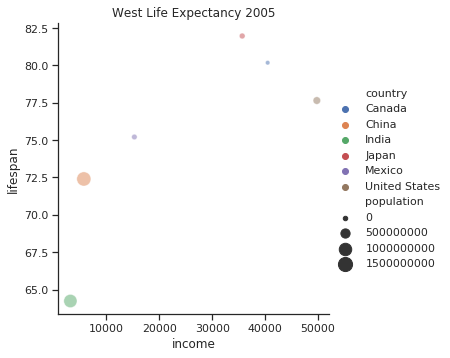

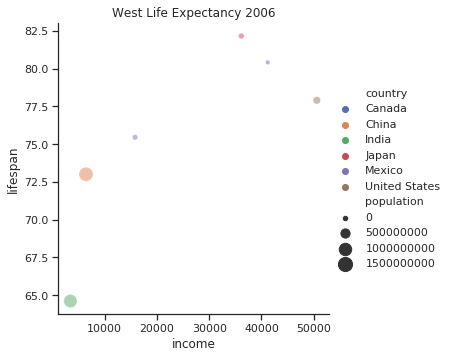

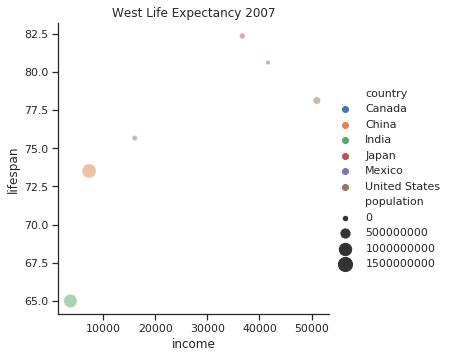

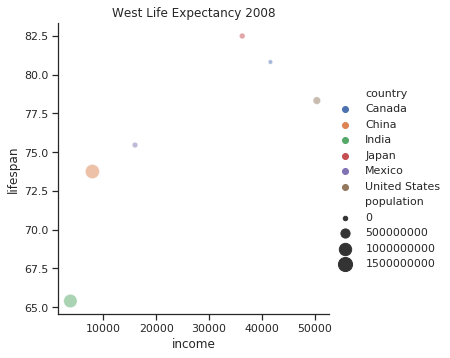

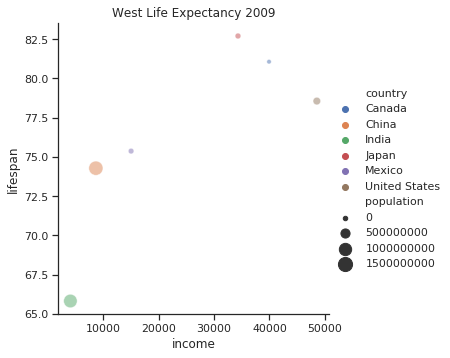

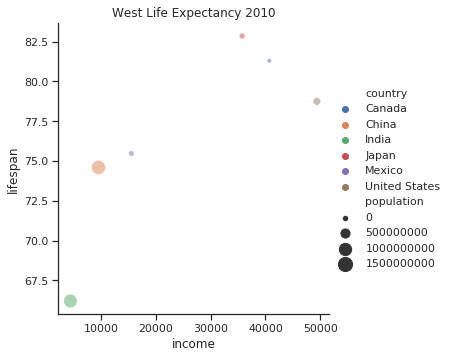

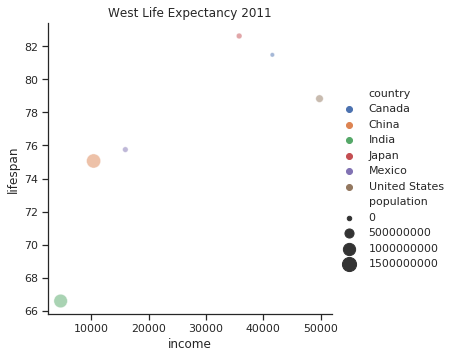

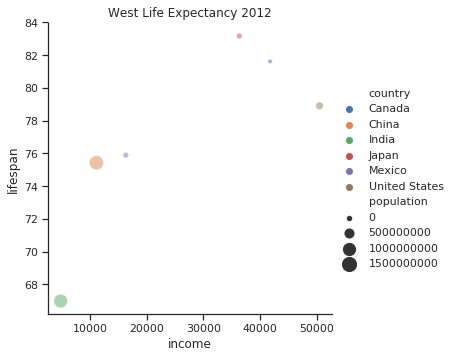

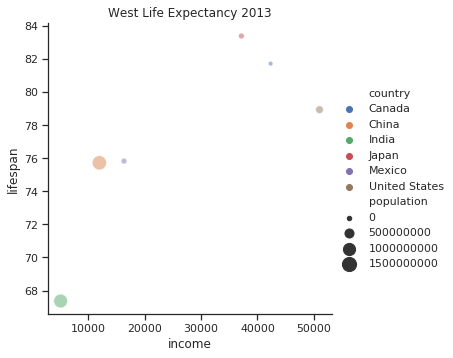

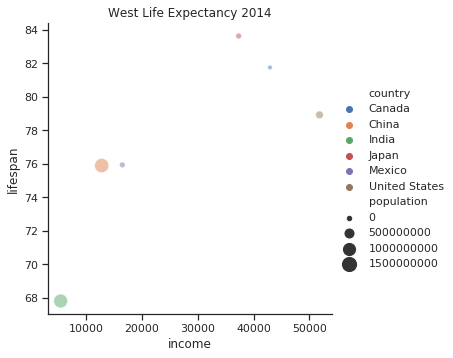

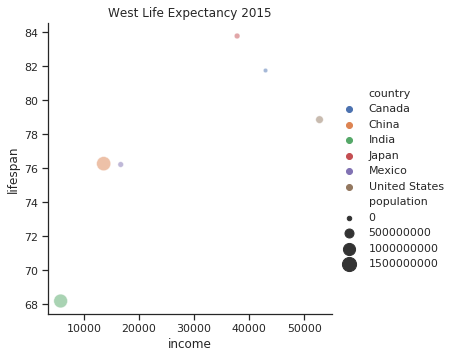

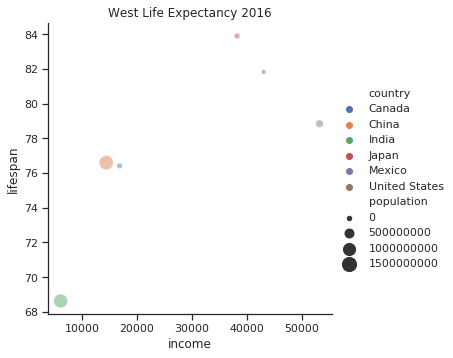

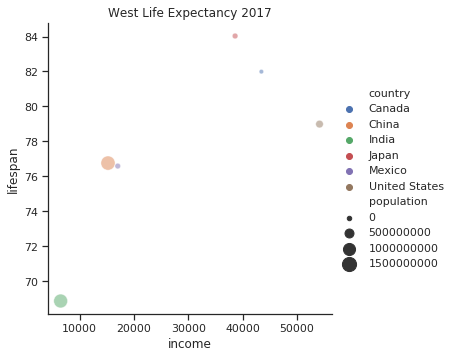

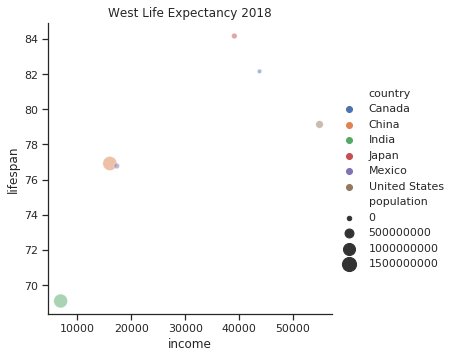

In [218]:
#Merge Income and Lifespan into new dataframe
df= pd.merge(income, lifespan)
#Merge new dataframe with population
df= pd.merge(df, population)
#Mered entities country, name, and region columns onto dataframe, using geo and country to merge on
df = pd.merge(df, entities[['country', 'name', 'world_6region']],
              left_on='geo', right_on='country')
#dropping geo and country
df.drop(columns= ['geo', 'country'], inplace= True)
#renaming columns in dataframe
df.rename(columns={
    'time':'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
}, inplace= True)

countries=[
    'United States',
    'Mexico',
    'Canada',
    'China',
    'India',
    'Japan'
]
plot_data= df[df['country'].isin(countries)]

def create_graph(data, year):
  data= data[data['year']== year]
  graph= sns.relplot(x='income', y= 'lifespan', hue= 'country', size= 'population', sizes=(20, 200), alpha= .5, data= data)
  plt.title('West Life Expectancy '+ str(year))
  return graph
  
for year in plot_data['year'].unique():
  create_graph(plot_data, year)



# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project